# Análisis de sentimientos de Twitter respecto a las votaciones presidenciales Colombia 2022

## Objetivo
En este proyecto se realiza un ejercicio básico para efectuar la extracción de datos de un tema de interés en Twitter, comoo lo son las elecciones presidenciales en Colombia efectuadas el 29 de mayo de 2022, procesar los textos de 5000 tweets y así establecer cuál es la polaridad de cada uno de ellos, además de la generación de una nube de términos qué permita establecer las temáticas tratadas.

Importar las librerías requeridas para extraer la información de Twitter por medio de la API para desarolladores de Twitter

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import csv
import pandas as pd
import numpy as np
import re
import plac
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Brindar los tokens para logerase en la API de Twitter, estos tokens son obtenidos trás la creación del proyecto y herramienta en la página de desarrolladores de Twitter. Son únicos y personales, por lo que deben ser suministrados los otorgados en la página. 

In [2]:
# Tokens de seguridad para acceso a API de Twitter.
consumer_key = 't24HMzNcD7rQRZVlkU35yxEh'
consumer_secret= '6k4ClLhXFz8r2kkTnXJtBMiT25rohBPJ5jIDCfvyRpAhXxGnb'
acces_token = '1458456343946436612-uBB8nvU2HbiTiVJxedtXhLn1A4FYa'
acces_token_secret = 'zGjZ6CV5tXCJh2pQ10XtDrwsnArcLbY2Xw7ncSNOL8b5'

In [3]:
# Autenticación y conexión al API.
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(acces_token,acces_token_secret)

In [4]:
api=tweepy.API(auth)

Verificar la conexión con Twitter por medio de la API.

In [5]:
try:
    api.verify_credentials()
    print("Conectado a Twitter")
except:
    print("Sin conexión a Twitter")

Conectado a Twitter


Consulta de Tweets a partir de un hashtag o palabra, para este caso se hace uso de: #EleccionesColombia
Dado que durante las elecciones presidenciales del día 29 de mayo de 2002 fué uno de los hashtag y palabras tendencia durante toda la jornada.

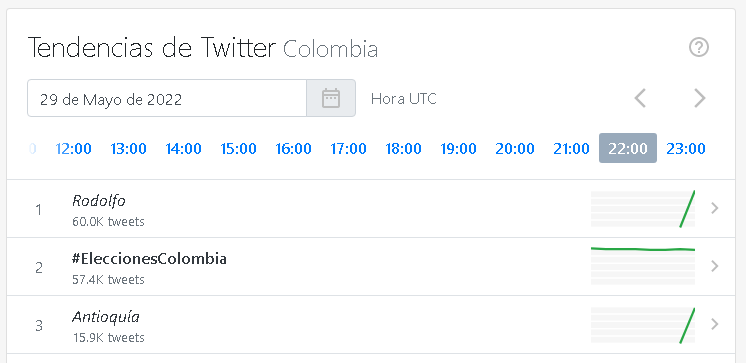

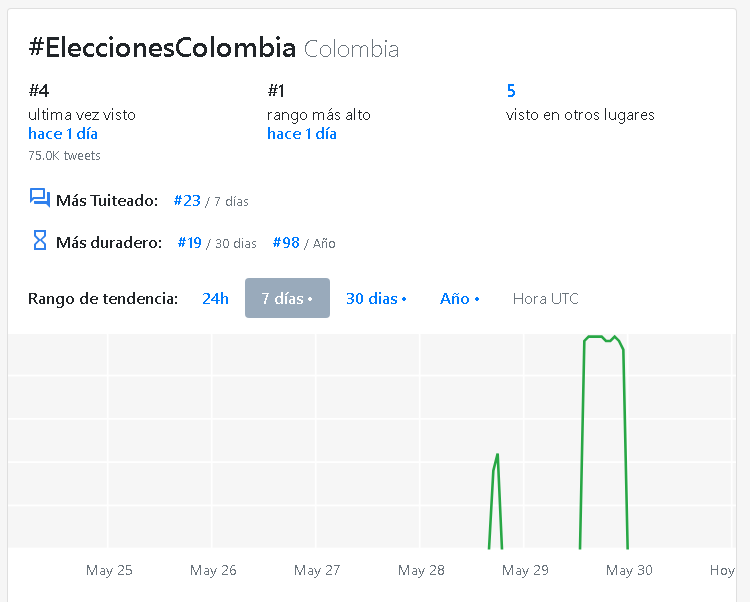

Consulta y visualización de los tweets

In [55]:
numtweet = 5000 # Cantidad total de los tweets a extraer
hashtag = '#EleccionesColombia' # Hashtag o palabra a búscar
fecha = '2022-05-29' # Fecha a partir de la que se realiza la búsqueda

In [50]:
# Este código fué tomado de: 
# https://www.geeksforgeeks.org/extracting-tweets-containing-a-particular-hashtag-using-python/
# Dado que intenté con varios métodos pero no me almacenaban la información extendida de los Tweets.

# Creación de una función para la visualización de los datos relevantes dentro de los tweets
def printtweetdata(n, ith_tweet):
        print()
        print(f"Tweet {n}:")
        print(f"Username:{ith_tweet[0]}")
        print(f"Description:{ith_tweet[1]}")
        print(f"Location:{ith_tweet[2]}")
        print(f"Following Count:{ith_tweet[3]}")
        print(f"Follower Count:{ith_tweet[4]}")
        print(f"Total Tweets:{ith_tweet[5]}")
        print(f"Retweet Count:{ith_tweet[6]}")
        print(f"Tweet Text:{ith_tweet[7]}")
        print(f"Hashtags Used:{ith_tweet[8]}")
        print(f"Fecha Tweet:{ith_tweet[9]}")

In [56]:
# Creación de la función para realizar la extracción de tweets
def scrape(words, date_since, numtweet):
 
        # Creación del dataframe utilizando Pandas
        db = pd.DataFrame(columns=['username',
                                   'description',
                                   'location',
                                   'following',
                                   'followers',
                                   'totaltweets',
                                   'retweetcount',
                                   'text',
                                   'hashtags',
                                    'created_at'])
 
        # Se utiliza .Cursor() para buscar los Tweets requeridos.
        # Se puede especificar el número de Tweets a ser extraidos
        # Esto depende támbien del tipo de cuenta y permisos otorgados por Twitter
        # Para el caso se realiza la extracción de 5000 tweets
        tweets = tweepy.Cursor(api.search_tweets,
                               hashtag, lang="es",
                               since_id=date_since,
                               tweet_mode='extended',
                              count=1000).items(numtweet)
 
 
        # .Cursor() devuelve un objeto iterable. cada elemento en
        # el iterador tiene varios atributos
        # al que puede acceder
        # obtener información sobre cada tweet
        list_tweets = [tweet for tweet in tweets]
 
        # Contador para almacenar la cantidad de tweets
        i = 1
 
        # iteraremos sobre cada tweet en la
        # lista para extraer información sobre cada tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                location = tweet.user.location
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']
                created_at = tweet.created_at
            
 
                # Los retweets se pueden distinguir por
                # un atributo retweeted_status,
                # en caso de que sea una referencia inválida,
                # excepto que se ejecutará el bloque
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
 
                # Aquí estamos agregando toda la
                # información extraída en el DataFrame
                ith_tweet = [username, description,
                             location, following,
                             followers, totaltweets,
                             retweetcount, text, hashtext, created_at]
                db.loc[len(db)] = ith_tweet
 
                # Función para imprimir los datos en pantalla
                printtweetdata(i, ith_tweet)
                i = i+1
        filename = 'scraped_tweets2.csv'
 
        # Guardado de los tweets en un archivo CSV.
        db.to_csv(filename)
        
if __name__ == '__main__':
 
        scrape(hashtag, date_since, numtweet)
        print('Scraping has completed!')


Tweet 1:
Username:Mikaelarca
Description:
Location:Venezuela
Following Count:417
Follower Count:40
Total Tweets:3831
Retweet Count:2441
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 02:25:39+00:00

Tweet 2:
Username:SebasRigger1011
Description:La democracia no perdura, cuando se escribe con la izquierda...
Location:
Following Count:1769
Follower Count:1191
Total Tweets:66680
Retweet Count:6
Tweet Text:#EleccionesColombia | La sencilla celebración de Rodolfo Hernández tras pasar a segunda vuelta | #ColombiaVota2022 | #PetroORodolfo https://t.co/rC387ryXOc
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 02:25:35+00:00

Tweet 3:
Username:MelgarejoJulie2
Description:Universidad Distrital ❤️
Location:
Following Count:414
Follower Count:134
Total Tweets:2524
Retweet Count:5
Tweet Text:Abrimos 

Tweet 38:
Username:mapuvi13
Description:
Location:Colombia
Following Count:51
Follower Count:159
Total Tweets:566
Retweet Count:35
Tweet Text:“Alístese para dentro de cuatro años”: el mensaje de Mario Hernández a Fico Gutiérrez | #EleccionesColombia #ColombiaVota2022   https://t.co/EqVx37E0hc
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 02:22:55+00:00

Tweet 39:
Username:marianela_m_m
Description:Opositora 100%
Location:Cabimas-Edo Zulia
Following Count:1229
Follower Count:366
Total Tweets:15224
Retweet Count:2441
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 02:22:54+00:00

Tweet 40:
Username:miangelfue
Description:No soy comunista es Asco al Uribismo. Felíz
Antiuribista.
Amante de la Salsita. Creo en un mejor país.  
Detesto la Guerra. La maldad se mide en URIBES.
Location:
Following Count:851
Follower 

Tweet 71:
Username:AnaVictorinox
Description:Porque la derecha oprime y la izquierda libera, #Obradorista.
Location:Sonora
Following Count:1615
Follower Count:1304
Total Tweets:16
Retweet Count:10
Tweet Text:Quién fue más sanguinario, @AlvaroUribeVel de Colmbia o @FelipeCalderon de México?

#PetroPresidenteEnPrimera #ColombiaConPetro #EleccionesColombia #ElCambioEnPrimera #ColombiaConPetro #YoVotoPetroPresidente

*Vamos Petrosky! Obviosky! :`) https://t.co/q7xq3pIzEG
Hashtags Used:['PetroPresidenteEnPrimera']
Fecha Tweet:2022-05-31 02:20:44+00:00

Tweet 72:
Username:AltagraciaJar
Description:Todos se sienten orgullusos de ser del norte... Yo veo a Nuevo León y me da pena ajena. 🤦‍♂️
Location:Sonora
Following Count:1741
Follower Count:1426
Total Tweets:13
Retweet Count:10
Tweet Text:Quién fue más sanguinario, @AlvaroUribeVel de Colmbia o @FelipeCalderon de México?

#PetroPresidenteEnPrimera #ColombiaConPetro #EleccionesColombia #ElCambioEnPrimera #ColombiaConPetro #YoVotoPetroPresidente

Tweet 105:
Username:macor972
Description:DEMOCRACIA  EN LA TIERRA, CREO EN DIOS TODOPODEROSO. ANTICOMUNISTA/ANTICASTRISTA
Location:EL MUNDO
Following Count:2008
Follower Count:1094
Total Tweets:251405
Retweet Count:481
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/oEOiHbBXn8
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 02:19:07+00:00

Tweet 106:
Username:guillo_m2005
Description:
Location:Pereira, Colombia
Following Count:247
Follower Count:620
Total Tweets:68871
Retweet Count:6
Tweet Text:#EleccionesColombia | La sencilla celebración de Rodolfo Hernández tras pasar a segunda vuelta | #ColombiaVota2022 | #PetroORodolfo https://t.co/rC387ryXOc
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 02:19:03+00:00

Tweet 107:
Username:abq0039
Description:
Location:
Following Count:4994
Follower Count:2471
Total Tweets:60775
Retweet Count:7
Tweet T

Tweet 139:
Username:Sir_Delko
Description:De un paraíso terrenal llamado Valle del Cauca ¿oís, ve #MaricaPeroNoUribista
Location:Polombia
Following Count:302
Follower Count:17
Total Tweets:29
Retweet Count:0
Tweet Text:Cómo reza en el himno de mi #ValleDelCauca: "adelante feliz juventud."

#PetroPresidente2022 
#FranciaMarquezVicepresidenta 
#EleccionesColombia 
#ColombiaPotenciaDeVida https://t.co/2oTRlU2Sg4
Hashtags Used:['ValleDelCauca', 'PetroPresidente2022', 'FranciaMarquezVicepresidenta', 'EleccionesColombia', 'ColombiaPotenciaDeVida']
Fecha Tweet:2022-05-31 02:16:04+00:00

Tweet 140:
Username:StevenMarOsp
Description:Defensor DDHH.  Investigador. Pensador Crítico.
Ex Desempleado. 
Me muevo por Bogotá. 
No uribista. No chavista.
Location:
Following Count:1335
Follower Count:1090
Total Tweets:28770
Retweet Count:53
Tweet Text:🇨🇴🗳️ #EleccionesColombia 
Gustavo Petro fue el candidato más votado en 18 de las 20 localidades. 
Federico Gutiérrez, quien quedó en tercer lugar en la votac

Description:MILLONARIOS DE COLOMBIA 🇨🇴 Ⓜ️ PARA TODA LA VIDA https://t.co/0SdMyMy7wx
Location:Bogotá, D.C., Colombia
Following Count:3038
Follower Count:436
Total Tweets:13365
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #RodolfoPresidente
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 02:13:40+00:00

Tweet 176:
Username:Nanabella2020
Description:
Location:
Following Count:151
Follower Count:219
Total Tweets:19748
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-

Total Tweets:2717
Retweet Count:757
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 02:11:48+00:00

Tweet 211:
Username:Ak47TheLegend
Description:El éxito no esta en vencer siempre sino en no desanimarse nunca.
Location:
Following Count:524
Follower Count:1711
Total Tweets:473278
Retweet Count:0
Tweet Text:Yo creo que ya hay un porcentaje muy claro para hablar de tendencia: Petro y Hernández irán a segunda vuelta. Esos debates serán de rechupete. #EleccionesColombia https://t.co/oHRsaYTPIj
Hashtags Used:[]
Fecha Tweet:2022-05-31 02:11:47+00:00

Tweet 212:
Username:mariaantoniagon
Description:Venezolana. Protejo a los animales del maltrato. Anticomunista.
Location:Venezuela
Following Cou

Description:PRESENTADORA PROG AMPÁRAME DIOS MÍO"https://t.co/GqNiYoLWvi MI TWITER PERSONAL CUENTA Y FOTO OFICIAL UNICA.
Location: QUIMICAMENTE PERIODISTA .
Following Count:3609
Follower Count:7344
Total Tweets:263703
Retweet Count:3
Tweet Text:#Política | La Coalición Centro Esperanza da libertad a sus integrantes para votar en segunda vuelta. #Elecciones2022🗳️  
#EleccionesColombia 

Amplíe la información:https://t.co/gOGKyppNzg https://t.co/uwIre31QnO
Hashtags Used:['Política', 'Elecciones2022']
Fecha Tweet:2022-05-31 02:10:10+00:00

Tweet 243:
Username:HarryDeWinds
Description:
Location:Colombia
Following Count:1257
Follower Count:193
Total Tweets:21659
Retweet Count:50
Tweet Text:¿Por quién votará en segunda vuelta? 

🔁 Gustavo Petro @petrogustavo 
💙 Rodolfo Hernández @ingrodolfohdez 

#ColombiaDecide #EleccionesColombia https://t.co/vNEy0P7JIe
Hashtags Used:[]
Fecha Tweet:2022-05-31 02:09:59+00:00

Tweet 244:
Username:ciudadanoSUZ
Description:
Location:
Following Count:579
Followe


Tweet 275:
Username:BibianaEstrada
Description:
Location:
Following Count:511
Follower Count:207
Total Tweets:545
Retweet Count:24
Tweet Text:Las votaciones de ayer dejan claro que  estamos cansados de la corrupción y exigimos cambios. ¡Entre todos podemos arrebatarle el poder a quienes no han sabido gobernarnos por años.!

 #EleccionesColombia #LaPrimeraVueltaFue #EleccionesPresidenciales2022 #Elecciones2022
Hashtags Used:[]
Fecha Tweet:2022-05-31 02:08:05+00:00

Tweet 276:
Username:LeoPini77
Description:#sosColombia A bird sitting on a tree is never afraid of the branch breaking because his trust is not in the branch ... but on his own wings
Location:
Following Count:1280
Follower Count:1203
Total Tweets:28047
Retweet Count:757
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron

Tweet 307:
Username:carlosg38808329
Description:
Location:
Following Count:21
Follower Count:116
Total Tweets:20279
Retweet Count:4
Tweet Text:#EleccionesColombia | VIDEO | La noche del triunfo se vivió como una “final de fútbol” en casa de Rodolfo Hernández. #ColombiaVota2022 
 https://t.co/81cgUh4jMc
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 02:06:04+00:00

Tweet 308:
Username:pilideleon3
Description:
Location:Bogotá, D.C., Colombia
Following Count:248
Follower Count:176
Total Tweets:3485
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 02:06:00+00:00

Tweet 309:
Username:123karolayn
Description:Directioner,kpoper!!
Instagram: @Karolayn__1D  :) No quiero saber el precio que voy a t


Tweet 337:
Username:esperanpaloa1
Description:Odontóloga ,especialista en Rehabilitación Oral!Feliz con mi vida , mi trabajo , mi entorno . Madre de tres hijos . Derecha total !! Uribista
Location:Colombia
Following Count:2023
Follower Count:1871
Total Tweets:6000
Retweet Count:262
Tweet Text:#EleccionesColombia | "Si ustedes hubieran ganado, hubieran ganado en primera vuelta": le dice @MariaFdaCabal al petrismo. #PetroORodolfo #ColombiaVota2022 

Vea más: https://t.co/TBuctnJf8i https://t.co/tDvgordkCt
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 02:04:03+00:00

Tweet 338:
Username:Rudos2012
Description:soy constructor, juego futbol,tengo una niña de quince años, soy soltero, mido 1 63.
Location:
Following Count:302
Follower Count:255
Total Tweets:50337
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un 

Tweet 372:
Username:Jubei0091983
Description:
Location:
Following Count:566
Follower Count:526
Total Tweets:16231
Retweet Count:10
Tweet Text:#Popayan   preparando grupos de WhatsApp y haciendo pedagogía en los centros comerciales ,. Está votación tiene que ser histórica!!!
#EleccionesColombia 
#PetroYFranciaSonElCambio
Hashtags Used:['Popayan']
Fecha Tweet:2022-05-31 02:02:36+00:00

Tweet 373:
Username:gisgil15
Description:Yo amo mi patria y usted.
Location:
Following Count:3422
Follower Count:4697
Total Tweets:235272
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #RodolfoPresidente
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 02:02:32+00:00

Tweet 374:
Username:SoyColo71001566
Description:Seguido por María Fernánda Cabal, Jaime Arizabaleta, 

Tweet 401:
Username:CarlosV78403828
Description:Un simple lector de Tweets y esporádico opinador
Location:Bogotá, D.C., Colombia
Following Count:785
Follower Count:53
Total Tweets:643
Retweet Count:13
Tweet Text:#EleccionesColombia | El izquierdista Gustavo Petro y el empresario Rodolfo Hernández han sido los candidatos más votados y disputarán la segunda vuelta. Consulte sus apoyos por departamento y en cada localidad https://t.co/KQQNuGQsqH
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 02:01:02+00:00

Tweet 402:
Username:marudobleu
Description:Periodista feminista | Realizadora de Podcast con el corazón en la radio 🖤📻  |
Junto a @MarchaOrgAr cubrimos América Latina #SinFronteras
Location:
Following Count:696
Follower Count:499
Total Tweets:2972
Retweet Count:1
Tweet Text:#EleccionesColombia 
El histórico triunfo del @PactoCol en las elecciones presidenciales, el camino hacia la segunda vuelta el 19/6 y todo sobre la cobertura especial que hicimos desde @MarchaOrgAr 🔥🖤
G

Tweet 431:
Username:PaideiaCo
Description:REFLEXIVA, CREATIVA, CURIOSA, RESERVADA, FRANCA.EXPLORO COMO TURISTA, CON OLFATO DE PERIODISTA, OJO DE FOTÓGRAFA, MANO DE ESCRITORA  E IMAGINACIÓN DE CINEASTA.
Location:
Following Count:381
Follower Count:164
Total Tweets:7634
Retweet Count:13
Tweet Text:#EleccionesColombia | El izquierdista Gustavo Petro y el empresario Rodolfo Hernández han sido los candidatos más votados y disputarán la segunda vuelta. Consulte sus apoyos por departamento y en cada localidad https://t.co/KQQNuGQsqH
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:59:48+00:00

Tweet 432:
Username:mafaldafox
Description:1oDeberes 2oDerechos/Al ser humano hay q enseñarle a pescar y no darle el pescado/Educad al👶para no castigar al👨‍💼/La ley sé cumple o sé acaba la milicia🇨🇴
Location:Colombia, 
Following Count:1751
Follower Count:1792
Total Tweets:132239
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en seg


Tweet 463:
Username:SebastianGue2
Description:Joven de 16 años progresista y política de la vida, Nunca extremos. Estudiante en ingeniería de sistemas. Por la paz y no por la guerra. 😁🇨🇴
Location:Bogotá, D.C., Colombia
Following Count:1642
Follower Count:1118
Total Tweets:14652
Retweet Count:53
Tweet Text:🇨🇴🗳️ #EleccionesColombia 
Gustavo Petro fue el candidato más votado en 18 de las 20 localidades. 
Federico Gutiérrez, quien quedó en tercer lugar en la votación general de la capital, encabezó la elección en Usaquén y Chapinero. https://t.co/fxgUwTkW7C
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:58:19+00:00

Tweet 464:
Username:fabiotorrescoy
Description:filosofía de la vida diaria
Location:
Following Count:925
Follower Count:467
Total Tweets:11067
Retweet Count:212
Tweet Text:Aquí con todos los formularios E-14 de la institución educativa en Pereira en la cual serví como testigo electoral cuidando los votos de Gustavo Petro y del Pacto Histórico. Viva la Democraci

Tweet 496:
Username:Fro20Diego
Description:El trabajo y la innovación constante
Location:
Following Count:222
Follower Count:365
Total Tweets:50553
Retweet Count:9
Tweet Text:#EleccionesColombia | La revolución de Ingrid que ha sorprendido en esta campaña presidencial | #ColombiaVota2022 | #PetroORodolfo https://t.co/LfBZ5yo0SO
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 01:56:15+00:00

Tweet 497:
Username:Davocius
Description:ociólogo.  zorranarquista.  gomelofóbico. fifas. terfajardista. le huyo al muñequeo.  me tienen harto.
Location:Xuacha 
Following Count:474
Follower Count:8739
Total Tweets:140240
Retweet Count:53
Tweet Text:🇨🇴🗳️ #EleccionesColombia 
Gustavo Petro fue el candidato más votado en 18 de las 20 localidades. 
Federico Gutiérrez, quien quedó en tercer lugar en la votación general de la capital, encabezó la elección en Usaquén y Chapinero. https://t.co/fxgUwTkW7C
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:56:13+00:


Tweet 528:
Username:simonjbolivarp
Description:
Location:
Following Count:220
Follower Count:136
Total Tweets:9865
Retweet Count:10
Tweet Text:#30May #EleccionesColombia
El Pdte de la #ANOPosición 
Juan Guaidó, celebró la realización de las elecciones presidenciales en Colombia este #29May. 
"Felicitaciones a todos los colombianos y a sus instituciones por la jornada electoral", dijo en su cuenta de Twitter. https://t.co/1aXfVRLsoy
Hashtags Used:['30May', 'EleccionesColombia', 'ANOPosición']
Fecha Tweet:2022-05-31 01:54:07+00:00

Tweet 529:
Username:bherreraurbano
Description:Sexo
Location:
Following Count:79
Follower Count:12
Total Tweets:61
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:54:01+


Tweet 559:
Username:Leonardomtch
Description:Ingeniero de sistemas, apasionado de la vida, rutero aficionado en bici. Tienes una mente retorcida e insana, ¿quisieras ser mi amigo?

A N T I U R I B I S T A
Location:Valledupar - Cesar
Following Count:1325
Follower Count:1823
Total Tweets:1605
Retweet Count:50
Tweet Text:¿Por quién votará en segunda vuelta? 

🔁 Gustavo Petro @petrogustavo 
💙 Rodolfo Hernández @ingrodolfohdez 

#ColombiaDecide #EleccionesColombia https://t.co/vNEy0P7JIe
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:52:07+00:00

Tweet 560:
Username:writercolombia
Description:aquí 🪶nadie me siguen oigan  y respondan cuando les pregunté 🗨️💬 escribiendo. economía, #Geopolítica, #Política. #ColombiaDecide
Location:colombia
Following Count:40
Follower Count:0
Total Tweets:66
Retweet Count:0
Tweet Text:@ingrodolfohdez respecto a las ayudas sociales #IngresoSolidario 
#Devoluciondeliva
#FamiliasEnAccion
#JovenesEnAccion 
#AdultoMayor etc
Que pasará los va terminar? #ColombiaDecide #

Tweet 589:
Username:Aemon3428
Description:Maestro. Guía y señor de la guardia nocturna. Viva la resistencia.👁️❄️❄️❄️❄️❄️❄️. "Verba Volant,  Scripta Manent"
Location:Poniente
Following Count:2938
Follower Count:15837
Total Tweets:577957
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 01:50:05+00:00

Tweet 590:
Username:JairoRamrezRia1
Description:Solo tenemos tres opciones el ingeniero, el loco o el viejito PRESIDENTE, por la defensa de la propiedad privada y la libertad...No al comunismo.
Location:
Following Count:71
Follower Count:180
Total Tweets:15814
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divi

Tweet 620:
Username:carlitoschapam
Description:@bucaramanga y el Dim.
Location:Bogota, Colombia
Following Count:1779
Follower Count:249
Total Tweets:4206
Retweet Count:50
Tweet Text:¿Por quién votará en segunda vuelta? 

🔁 Gustavo Petro @petrogustavo 
💙 Rodolfo Hernández @ingrodolfohdez 

#ColombiaDecide #EleccionesColombia https://t.co/vNEy0P7JIe
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:48:03+00:00

Tweet 621:
Username:drlozanom
Description:
Location:Bogota
Following Count:153
Follower Count:96
Total Tweets:107279
Retweet Count:149
Tweet Text:🇨🇴 | #EleccionesColombia Luego de polémica propuesta de Rodolfo Hernández de llevar a todos los colombianos a conocer el mar, muchos colombianos se preguntan si las mujeres están incluidas o se tienen que quedar en la casa. https://t.co/uw1poYat6Q
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:48:00+00:00

Tweet 622:
Username:danielalvistor1
Description:
Location:
Following Count:107
Follower Count:54
Total Tweets:1350
Retweet C


Tweet 650:
Username:DavidDelgado_Mx
Description:Politólogo y Activista Digital 🇲🇽 
Presidente y Fundador de @LANPEC_Oficial
Pasante en la V generación de @PolitologosD 
#SoyDavidDM #ComPol #PolDigitalesMex
Location:Pachuca de Soto, Hidalgo
Following Count:2841
Follower Count:286
Total Tweets:717
Retweet Count:1
Tweet Text:Agradecemos a @SaraLaMexicana_ y @gabrielzerpal, dos profesionales de la #Compol, que participaron en nuestra mesa de análisis de las #EleccionesColombia 

Puedes ver este ejercicio aquí 👇🏼

https://t.co/TWzYR7qjnv https://t.co/IkmvYgTi49
Hashtags Used:['Compol']
Fecha Tweet:2022-05-31 01:46:08+00:00

Tweet 651:
Username:germanch0
Description:Rolo enamorado del valle
#SeguridadAlimentaria
Location:Guadalajara de Buga, Colombia
Following Count:457
Follower Count:202
Total Tweets:842
Retweet Count:50
Tweet Text:¿Por quién votará en segunda vuelta? 

🔁 Gustavo Petro @petrogustavo 
💙 Rodolfo Hernández @ingrodolfohdez 

#ColombiaDecide #EleccionesColombia https://t.co/vNE


Tweet 680:
Username:camisilverman
Description:Creo en el despertar de la conciencia.
Location:Colombia 
Following Count:912
Follower Count:553
Total Tweets:1142
Retweet Count:50
Tweet Text:¿Por quién votará en segunda vuelta? 

🔁 Gustavo Petro @petrogustavo 
💙 Rodolfo Hernández @ingrodolfohdez 

#ColombiaDecide #EleccionesColombia https://t.co/vNEy0P7JIe
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:44:30+00:00

Tweet 681:
Username:lamarce_v
Description:A veces da miedito pero siempre mirando hacia adelante
Location:
Following Count:3587
Follower Count:3293
Total Tweets:2240
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 01:44:24+00:00

Tweet 682:
Username:Ocarin21Trian


Tweet 711:
Username:PedroAvilaO
Description:Abogado Conciliador Magister en Gobernabilidad y Democracia. Promotor y constructor de las Culturas de Paz, Legalidad y Ciudadana.
Location:BogotaDC - Colombia
Following Count:612
Follower Count:559
Total Tweets:40184
Retweet Count:30
Tweet Text:Los elogios que hizo Gustavo Petro a Rodolfo Hernández, a quien ahora critica | #EleccionesColombia #ColombiaVota2022 #PetroORodolfo  https://t.co/m2hqFNJjNV
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 01:43:03+00:00

Tweet 712:
Username:luzsiria
Description:Abogada Libre Ejercicio
Location:Mérida Lagunillas
Following Count:456
Follower Count:134
Total Tweets:9462
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 01:43:01+00:00

Tweet 713:
Username:camapadilla
Description:
Location:
F


Tweet 741:
Username:Edithmjankowski
Description:Hija de Dios y Maria, esposa y madre...Colombiana
Location:
Following Count:539
Follower Count:92
Total Tweets:2709
Retweet Count:30
Tweet Text:Los elogios que hizo Gustavo Petro a Rodolfo Hernández, a quien ahora critica | #EleccionesColombia #ColombiaVota2022 #PetroORodolfo  https://t.co/m2hqFNJjNV
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 01:41:45+00:00

Tweet 742:
Username:patjz1006
Description:D
Location:Bucaramanga, Colombia
Following Count:361
Follower Count:29
Total Tweets:318
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 01:41:43+00:00

Tweet 743:
Username:ricardocipago
De

Tweet 771:
Username:RodrigoTorresRT
Description:Periodista/journalist. RadioLover. Director de contenido en @ValoraAnalitik. Lector y muy escritor.
Location:Bogotá, D.C., Colombia
Following Count:913
Follower Count:2362
Total Tweets:22981
Retweet Count:4
Tweet Text:#Mercado | Los resultados de las #EleccionesColombia y el aumento en los precios del petróleo llevaron a que el dólar next day registrara una importante caída en este lunes festivo. Conozca más detalles. 💵
https://t.co/lGb8bUzMP1
Hashtags Used:['Mercado', 'EleccionesColombia']
Fecha Tweet:2022-05-31 01:40:26+00:00

Tweet 772:
Username:JimiJV
Description:Uribista defensor de los niños y los animales PENA DE MUERTE A VIOLADORES Y CADENA PERPETUA A CORRUPTOS. Tenis, lectura, vallenatos.
Location:Medellin
Following Count:79
Follower Count:236
Total Tweets:10476
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colom

Tweet 803:
Username:JuanCamilo
Description:Politólogo, especialista en marketing politico y opinión publica, trabajando en comunicaciones estrategicas. Opiniones personales.
Location:Colombia
Following Count:4325
Follower Count:8998
Total Tweets:52253
Retweet Count:6
Tweet Text:¿Te duele? Me encanta.
Lloraton del petrismo por el Ingeniero. 

#EleccionesColombia 
https://t.co/Ci4XZA5P11
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:38:30+00:00

Tweet 804:
Username:CT_Torres7
Description:Capitán (RA) Ejercito🇨🇴 Dios, familia y patria.
Location:
Following Count:3501
Follower Count:3697
Total Tweets:7921
Retweet Count:38
Tweet Text:#EleccionesColombia | Marelen Castillo, la ficha decisiva en la campaña de Rodolfo Hernández | #ColombiaVota2022 | #PetroORodolfo https://t.co/enJBKdwgnN
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 01:38:26+00:00

Tweet 805:
Username:jedajiro
Description:
Location:Medellin
Following Count:88
Follower Count:81


Follower Count:109
Total Tweets:4429
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 01:36:43+00:00

Tweet 837:
Username:hebertogu
Description:
Location:Caracas, Venezuela
Following Count:431
Follower Count:235
Total Tweets:23859
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 01:36:38+00:00

Tweet 838:
Username:Jmercadovillad1
Description:
Location:Montería, Colombia
Following Count:1889
Follower Count:165
Total Tweets:9373
Retweet Count:24
Tweet Text:“No coman cuento”: el fake news qu


Tweet 866:
Username:ltarra
Description:Luis Tarrá Gallego Comunicador Social - Periodista, tadeísta. Magíster en Periodismo de Agencia de Universidad Rey Juan Carlos de España.
Location:Cartagena de Indias, Bolívar 
Following Count:450
Follower Count:926
Total Tweets:36547
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #RodolfoPresidente
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:34:31+00:00

Tweet 867:
Username:Fruticamp1
Description:Tienda de frutas y verduras https://t.co/v8M4J0vYfg
Location:Ibagué, Colombia
Following Count:294
Follower Count:69
Total Tweets:3843
Retweet Count:35
Tweet Text:#EleccionesColombia | “Esos 11 millones de votos ya son suyos”: Pacho Santos a Rodolfo Hernández | #ColombiaVota2022 https://t.co/bfwZLJX1Uc
Hasht

Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:33:10+00:00

Tweet 895:
Username:OscarFerVelosa
Description:100% Uribista!🇨🇴🇨🇴🇨🇴
Location:Colombia
Following Count:751
Follower Count:867
Total Tweets:7589
Retweet Count:323
Tweet Text:“Tenemos ‘anticuerpos’ maravillosos que nos protegen del cáncer de la izquierda”: Abelardo de la Espriella | #EleccionesColombia #ColombiaVota2022   https://t.co/bNh3RISN7v
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:33:07+00:00

Tweet 896:
Username:kurrunga
Description:
Location:Medellín, Colombia
Following Count:55
Follower Count:254
Total Tweets:78303
Retweet Count:86
Tweet Text:Enrique Gómez: “Si Gustavo Petro llega a la presidencia, no la soltará nunca” | #EleccionesColombia #ColombiaVota2022 #PetroORodolfo  https://t.co/CwOXWOB9Gu
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 01:33:02+00:00

Tweet 897:
Username:soymacondiano
Description:Analista, centrado en lo fundamental. Detesto el mamertismo solo crí

Tweet 922:
Username:unikornio160
Description:🇨🇴Sin justicia NO hay paz🇨🇴
Location:
Following Count:919
Follower Count:1680
Total Tweets:73481
Retweet Count:11
Tweet Text:Pues tocó, que más hacemos 🤭 #EleccionesColombia https://t.co/AUfw718aWL
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:31:16+00:00

Tweet 923:
Username:CDLMSupporter
Description:| CDLM |
Location:En la grada
Following Count:279
Follower Count:1278
Total Tweets:99956
Retweet Count:53
Tweet Text:🇨🇴🗳️ #EleccionesColombia 
Gustavo Petro fue el candidato más votado en 18 de las 20 localidades. 
Federico Gutiérrez, quien quedó en tercer lugar en la votación general de la capital, encabezó la elección en Usaquén y Chapinero. https://t.co/fxgUwTkW7C
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:31:14+00:00

Tweet 924:
Username:metodologiaecs
Description:Cuenta alterna de Pedro Brito.
Location:Caracas - Venezuela
Following Count:1703
Follower Count:982
Total Tweets:108744
Retweet Count:3
Tweet 


Tweet 950:
Username:maruja50
Description:Soy independiente de pensamiento, obra y acción. No creo en mesías ni cosas parecidas. Mi orientación política es clara,contraria a lo impuesto.🙃
Location:Bogotá
Following Count:1547
Follower Count:1576
Total Tweets:92239
Retweet Count:10
Tweet Text:#Popayan   preparando grupos de WhatsApp y haciendo pedagogía en los centros comerciales ,. Está votación tiene que ser histórica!!!
#EleccionesColombia 
#PetroYFranciaSonElCambio
Hashtags Used:['Popayan']
Fecha Tweet:2022-05-31 01:29:27+00:00

Tweet 951:
Username:JhonJmaldonado
Description:
Location:
Following Count:593
Follower Count:820
Total Tweets:104542
Retweet Count:14
Tweet Text:#EleccionesColombia | Mario Hernández fijó su postura y reveló a qué candidato apoyará en segunda vuelta | #ColombiaVota2022  https://t.co/HqM7xZoTj2
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:29:24+00:00

Tweet 952:
Username:Peindependiente
Description:INFORMACIÓN SOBRE REALIDADES REALES Y SUPUES

Fecha Tweet:2022-05-31 01:28:06+00:00

Tweet 979:
Username:CT_Torres7
Description:Capitán (RA) Ejercito🇨🇴 Dios, familia y patria.
Location:
Following Count:3501
Follower Count:3697
Total Tweets:7921
Retweet Count:481
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/oEOiHbBXn8
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:28:06+00:00

Tweet 980:
Username:amautajorge
Description:
Location:
Following Count:3910
Follower Count:2124
Total Tweets:60444
Retweet Count:23
Tweet Text:#EleccionesColombia | “Es una macha”: la historia de cómo la esposa de Rodolfo Hernández fue la que lo hizo rico, según él | #ColombiaVota2022 | #PetroORodolfo https://t.co/DFoCHDlCPB
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:28:01+00:00

Tweet 981:
Username:57Saraleal
Description:.
Location:
Following Count:33
Follower Count:88
Total Tweets:15340
Retweet Count:3143
Tweet Text:Ay

Tweet 1008:
Username:topo413
Description:
Location:Venezuela
Following Count:502
Follower Count:115
Total Tweets:626
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 01:26:42+00:00

Tweet 1009:
Username:kurrunga
Description:
Location:Medellín, Colombia
Following Count:55
Follower Count:254
Total Tweets:78303
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #RodolfoPresidente
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:26:38+00:00

Tweet 1010:
Username:OsSuaxeneyer
Description:No alimente al oso | El oso lo sabe todo menos la combinación de la caja fuerte | Bod

Tweet 1038:
Username:EpaQHubo
Description:❤️Acepto todo lo que hubo.Nunca busqué mejor suerte.🥂 Acaso hay algo mejor que haber amado💕Algo mejor que haber ardido🔥🫂
Bustamante✍️  #CubaPorSiempre
Location:Venezuela
Following Count:1360
Follower Count:1063
Total Tweets:8996
Retweet Count:4
Tweet Text:🇨🇴 Colombia pone a prueba en las urnas su voluntad de cambio.

El candidato Gustavo Petro, parte como favorito con la incógnita de quién lo acompañará a la segunda vuelta. #EleccionesColombia #ColombiaDecide 

@petrogustavo @FranciaMarquezM 

https://t.co/RaD63DKE3s
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:24:52+00:00

Tweet 1039:
Username:Xelenass
Description:Antichavista, antisocialista, anticomunista. Quiero a mi Venezuela libre y próspera 🙏🇻🇪💖✨
Location:
Following Count:67
Follower Count:39
Total Tweets:2041
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8


Tweet 1066:
Username:achristiandavid
Description:•Est. Periodismo U. Sergio Arboleda │Las mentiras no son “diferencias de opinión”. 🇨🇴 y 🥷
Location:
Following Count:2725
Follower Count:4889
Total Tweets:4455
Retweet Count:14
Tweet Text:Entonces el Ministro del Interior estuvo ayer en la sede de campaña (derrota) de ‘Fico’ Gutiérrez. Hasta el último momento el Gobierno Duque violando la ley participando abiertamente en política electoral. Ya van de salida y están desesperados #EleccionesColombia.
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:23:20+00:00

Tweet 1067:
Username:edusoff
Description:Antipático según mis vecinos, orgulloso según mi familia y educado según yo...
Ing. Agrónomo 🥑

Unfollow = Unfollow 👎
Location:Antioquia, Colombia
Following Count:1228
Follower Count:1895
Total Tweets:61269
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia 


Tweet 1096:
Username:ricardo131946
Description:
Location:
Following Count:400
Follower Count:113
Total Tweets:1643
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 01:21:17+00:00

Tweet 1097:
Username:andvez97
Description:Me gusta saber de todo un poco.
Location:Medellín, Colombia
Following Count:153
Follower Count:128
Total Tweets:6537
Retweet Count:16
Tweet Text:Empecé a revisar el programa de @ingrodolfohdez y entre lo más interesante que he encontrado (llevando apenas 1/3) está lo siguiente:

Parte 1

#EleccionesColombia 

Abro hilo 🧶
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:21:17+00:00

Tweet 1098:
Username:hec_salaz
Description:Soy de aquellos que sueñan con la

Tweet 1126:
Username:conviale
Description:REGRESÉ DE LOS SOTANOS DE LA TESIS 

"De todo como en botica"
 
Abogado Constitucionalista
Máster ComPol @fortegamaranon 
Doctorando MPAISC @UniversidadeUSC
Location:
Following Count:223
Follower Count:38
Total Tweets:631
Retweet Count:5
Tweet Text:Es un error enfrentar con grandes discursos y teorías políticas a quien entiende la política como entretenimiento.

La gente está cansada de la política y sus formas.

No se equivoquen. El terreno de combate cambió. 

#Elecciones2022 
#ColombiaDecide 
#EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:19:37+00:00

Tweet 1127:
Username:FuegianSan
Description:¡Administrador de empresas turísticas y hoteleras!
Amante de la historia, un buen libro, los viajes y experiencias gastronómicas!
Location:
Following Count:772
Follower Count:431
Total Tweets:9177
Retweet Count:0
Tweet Text:Encerrar a un colectivo de personas por ideología diferente para luego exterminarlas sistemáticamente... En qué A


Tweet 1156:
Username:OliVasquez
Description:
Location:ï¿½T: 10.503787,-66.851398
Following Count:222
Follower Count:124
Total Tweets:2298
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 01:17:52+00:00

Tweet 1157:
Username:oscar__triana
Description:Filmmaker // Animador, ilustrador, diseñador. Hago cortos. Star Wars in a Notebook, Zapatos, En medio de la nada. Google knows.  #illustration #art #animation
Location:
Following Count:1290
Follower Count:378
Total Tweets:7191
Retweet Count:53
Tweet Text:🇨🇴🗳️ #EleccionesColombia 
Gustavo Petro fue el candidato más votado en 18 de las 20 localidades. 
Federico Gutiérrez, quien quedó en tercer lugar en la votación general de la capital, encabezó la elección en Usaquén y Chapinero. https://t.co/fxgUwTkW7C
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05


Tweet 1185:
Username:anamilemontoya
Description:
Location:Bogota
Following Count:1345
Follower Count:501
Total Tweets:403
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-31 01:15:11+00:00

Tweet 1186:
Username:f3a817c9a9e540b
Description:
Location:Bogotá, D.C., Colombia
Following Count:83
Follower Count:32
Total Tweets:10012
Retweet Count:30
Tweet Text:Le aposté todo mi tiempo, mi dinero y hasta mi fé a Rodolfo Hernández y valió la pena cada maldito segundo.

Ahora estoy más que seguro que podemos cambiar la historia todos los colombianos. Te amo Colombia.

#RodolfoPresidente #RodolfoHernandezPresidente #EleccionesColombia
Hashtags Used:[]
Fecha Twee

Follower Count:3201
Total Tweets:3174
Retweet Count:0
Tweet Text:#EnVivo - Balance del @ingrodolfohdez sobre las #EleccionesColombia y su hoja de ruta para enfrentar la #SegundaVuelta #NoticieroNacionalDigital https://t.co/V5mxOpWypC
Hashtags Used:['EnVivo', 'EleccionesColombia', 'SegundaVuelta', 'NoticieroNacionalDigital']
Fecha Tweet:2022-05-31 01:13:09+00:00

Tweet 1214:
Username:CazdosMdc
Description:Writer, Painter & Artist since 2001   https://t.co/dEDvCit3bI
Location:Bogotá D.C
Following Count:410
Follower Count:579
Total Tweets:1760
Retweet Count:0
Tweet Text:Viejito ya es meme y aún no ha sido elegido presidente #EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:13:08+00:00

Tweet 1215:
Username:Danielguer969
Description:la vida sobre todas las cosas
Location:
Following Count:168
Follower Count:93
Total Tweets:5437
Retweet Count:77
Tweet Text:#PetroORodolfo | "No tengo ningún interés diferente, de generarles felicidad, que lleguen a fin de mes b


Tweet 1244:
Username:MeblaNa
Description:¡Estamos viviendo nuevos tiempos!
Location:
Following Count:140
Follower Count:136
Total Tweets:9555
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 01:11:29+00:00

Tweet 1245:
Username:carmenluciazg
Description:
Location:Medellín, Colombia
Following Count:2078
Follower Count:3660
Total Tweets:301801
Retweet Count:70
Tweet Text:Roy Barreras trata de “ignorante” a Rodolfo Hernández en redes sociales | #EleccionesColombia #ColombiaVota2022  
 https://t.co/Ne3H98JiFn
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 01:11:29+00:00

Tweet 1246:
Username:renego1160
Description:irreductible ♑️
Location:
Following Count:230
Follower Count:93
Total Tweets:7988
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #C

Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:09:31+00:00

Tweet 1271:
Username:OscarCParra
Description:Abogado. Especialista en Derecho Administrativo. Especialista en Contratación Estatal.Maestrando en Contratación Estatal. Millonarios FC. Seré breve, Su Señoría
Location:Chía (Cund.) - Colombia
Following Count:4008
Follower Count:4225
Total Tweets:144235
Retweet Count:53
Tweet Text:🇨🇴🗳️ #EleccionesColombia 
Gustavo Petro fue el candidato más votado en 18 de las 20 localidades. 
Federico Gutiérrez, quien quedó en tercer lugar en la votación general de la capital, encabezó la elección en Usaquén y Chapinero. https://t.co/fxgUwTkW7C
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:0


Tweet 1300:
Username:maryleal1111
Description:La verdadera sabiduría está en reconocer la propia ignorancia.                  ~Sócrates
Location:Toronto, Ontario
Following Count:986
Follower Count:580
Total Tweets:34082
Retweet Count:1
Tweet Text:En esta análisis que hace el profesor y analista internacional @eagamarra01 “le va a costar mucho a Petro ganar en segunda vuelta con Rodolfo Hernández como contrincante" petro no la tiene facil 11.000000 millones por el buche ...

#analisis #noticias #eleccionescolombia https://t.co/SJ9uIhi8Bv
Hashtags Used:[]
Fecha Tweet:2022-05-31 01:07:29+00:00

Tweet 1301:
Username:CarlosH96752413
Description:Sencillo
Location:
Following Count:20
Follower Count:1
Total Tweets:28
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #


Tweet 1329:
Username:Anders978
Description:🌎✌️
Location:Ibagué, Colombia
Following Count:267
Follower Count:151
Total Tweets:11834
Retweet Count:27
Tweet Text:Denle una mirada al HT #PetristasAlLimite , diversión asegurada con la lloraton petrista por el ingeniero.

#EleccionesColombia 

 https://t.co/MWpPcmThAS
Hashtags Used:['PetristasAlLimite']
Fecha Tweet:2022-05-31 01:04:51+00:00

Tweet 1330:
Username:MaraPaz38508965
Description:"La vida no vale nada
cuando otros se están matando
y yo sigo aquí cantando
cual si no pasara nada"

Antiuribista- Pacto Histórico- Petro Presidente
Location:Medellín 
Following Count:2034
Follower Count:1074
Total Tweets:30608
Retweet Count:4
Tweet Text:Sorpresas de #EleccionesColombia  @CarlosAmayaR 
Con una responsabilidad histórica enorme,  el valor de la factura lo sabremos con el tiempo. En poco tiempo. 
#SinPingadas
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:04:42+00:00

Tweet 1331:
Username:OscarDomnguezC
Description:En busca d


Tweet 1356:
Username:carlosg38808329
Description:
Location:
Following Count:21
Follower Count:116
Total Tweets:20279
Retweet Count:14
Tweet Text:#EleccionesColombia | Ante las críticas, Echeverry hizo un nuevo comentario en el mismo sentido del anterior, aunque aclaró que su posición generó algunas críticas | #ColombiaVota2022 | #PetroORodolfo https://t.co/VXEykEHmXC
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:03:07+00:00

Tweet 1357:
Username:HectorH62057823
Description:diversion
Location:
Following Count:407
Follower Count:103
Total Tweets:138
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 01:03:01+00:00

Tweet 1358:
Username:jean_lipz
Descriptio

Tweet 1383:
Username:fergie_loraine
Description:
Location:
Following Count:2
Follower Count:2
Total Tweets:11
Retweet Count:21
Tweet Text:Después de 20 años, en Colombia habrá un cambio.

#SegundaVuelta #EleccionesPresidenciales2022 #EleccionesColombia #Elecciones2022
Hashtags Used:['SegundaVuelta', 'EleccionesPresidenciales2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 01:01:24+00:00

Tweet 1384:
Username:carlosg38808329
Description:
Location:
Following Count:21
Follower Count:116
Total Tweets:20279
Retweet Count:21
Tweet Text:#EleccionesColombia | Mario Hernández fijó su postura y reveló a qué candidato apoyará en segunda vuelta| #ColombiaVota2022 https://t.co/P5Ih4bqneL
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 01:01:24+00:00

Tweet 1385:
Username:trabajador90
Description:
Location:
Following Count:396
Follower Count:175
Total Tweets:5707
Retweet Count:35
Tweet Text:#EleccionesColombia | “Olvídense de esos cuentos que soy uribista o petrista”: Rodolfo Hernánde

Tweet 1413:
Username:jorgeabalo
Description:
Location:
Following Count:837
Follower Count:163
Total Tweets:430
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:59:59+00:00

Tweet 1414:
Username:fegoga622
Description:Conocer y darme a conocer como soy-.
Location:
Following Count:175
Follower Count:127
Total Tweets:4956
Retweet Count:3
Tweet Text:"Oh Colombiano, vamo' a la lucha, vamo' a salvar nuestro País".

Hoy es el momento de observar los frutos de tanta lucha que se ha vivido en medio de la búsqueda por el  cambio.
#EleccionesColombia 
#PetroYFrancia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:59:58+00:00

Tweet 1415:
Username:RevistaSemana
Description:Periodismo con carácter.
Location:Colombia


Tweet 1442:
Username:Siemprelacago3
Description:▪Bachiller @ Opus Dei School Ernesto Macias
▪Economista @ Universidad Nicolas Maduro
▪PhD Resolucion de conflictos @ Universidad AUV
Location:
Following Count:2494
Follower Count:400
Total Tweets:9990
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:58:26+00:00

Tweet 1443:
Username:AndreyJohanns
Description:No estoy disponible.
Location:
Following Count:178
Follower Count:27
Total Tweets:2744
Retweet Count:0
Tweet Text:Tanto tiempo que demoran tirando mierda a un candidato u otro, ¿porqué no lo usan para apoyar a su candidato de preferencia?
#EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-3


Tweet 1471:
Username:Rossyross17
Description:Un día,  buscando justicia, encontré a los justos; ellos estaban en la izquierda,  luego ví  que leían y eran inteligentes... y que por eso los mataban!!!
Location:Cali, Colombia
Following Count:1944
Follower Count:1802
Total Tweets:25819
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:56:35+00:00

Tweet 1472:
Username:williamgherrera
Description:Santandereano. 
Padre de familia.
Location:Bucaramanga, Colombia
Following Count:90
Follower Count:348
Total Tweets:30109
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no con


Tweet 1498:
Username:Fruticamp1
Description:Tienda de frutas y verduras https://t.co/v8M4J0vYfg
Location:Ibagué, Colombia
Following Count:294
Follower Count:69
Total Tweets:3843
Retweet Count:21
Tweet Text:“Ahora empieza el segundo tiempo”: Jorge Luis Pinto a Rodolfo Hernández | #EleccionesColombia #ColombiaVota2022   https://t.co/OUQICFyfMQ
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 00:55:19+00:00

Tweet 1499:
Username:Juankraamos
Description:|ANTIURIBISTA| |Psicólogo|

|@unionmagdalena|
Location:Santa Marta, Colombia
Following Count:325
Follower Count:2324
Total Tweets:106276
Retweet Count:15
Tweet Text:Mire este mapa ya contado con todos los municipios del país. El Pacto Histórico ESTA EN TODOS LOS DEPARTAMENTOS. La región Andina es la que debemos quitar votos al Rodolfo. #EleccionesColombia #PactoHistórico #YoVotoPetroPresidente #FranciaMarquezVicepresidenta https://t.co/EfsS7LlIum
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:55:14+00:00

Tweet 1

Tweet Text:Mire este mapa ya contado con todos los municipios del país. El Pacto Histórico ESTA EN TODOS LOS DEPARTAMENTOS. La región Andina es la que debemos quitar votos al Rodolfo. #EleccionesColombia #PactoHistórico #YoVotoPetroPresidente #FranciaMarquezVicepresidenta https://t.co/EfsS7LlIum
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:53:24+00:00

Tweet 1525:
Username:benkoscaicedo
Description:Físico y casi doctor en ciencia de materiales, montañero, mamerto, 'ñuco'.
Location:Colombia
Following Count:1686
Follower Count:489
Total Tweets:31102
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:53:09+00:00

Tweet 1526:
Username:jgbdim
Description:Antiuribista 💯%...Necesitamos un cambio para este país,el futuro de este país, está 


Tweet 1553:
Username:RotaviskyC
Description:De la gente, para la gente💪💪♥️🐝🐝🥑🥑🥑
Location:Santiago, Chile
Following Count:4993
Follower Count:3073
Total Tweets:104667
Retweet Count:4
Tweet Text:Sondeo de opinión.

Para dónde se van a ir los votos de #SergioFajardo?

#ColombiaDecide
#Colombia
#EleccionesColombia
Hashtags Used:['SergioFajardo', 'ColombiaDecide', 'Colombia', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:51:36+00:00

Tweet 1554:
Username:EdisonPrieto17
Description:Enamorado de DIOS, los animales, la naturaleza y mi hija.
Location:
Following Count:105
Follower Count:43
Total Tweets:1375
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #RodolfoPresidente
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:51:29+00:00

Tweet 1555:
Userna

Tweet 1580:
Username:Pulpeins
Description:
Location:Quito - Ecuador
Following Count:2033
Follower Count:797
Total Tweets:166594
Retweet Count:2
Tweet Text:#Mundo | ¿Hitler un gran pensador?

Según el finalista para la segunda vuelta de #ColombiaVota sí: Rodolfo Hernández

#ColombiaVota2022 
#EleccionesColombia 
#Fascismo https://t.co/5VhqI0OxaR
Hashtags Used:['Mundo', 'ColombiaVota']
Fecha Tweet:2022-05-31 00:49:37+00:00

Tweet 1581:
Username:FreddyTellezP
Description:JESUS ES EL CAMINO,LA VERDAD Y LA VIDA 🙏🙏🙏
Location:
Following Count:353
Follower Count:330
Total Tweets:14891
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-31 00:49:28+00:00

Tweet 15


Tweet 1606:
Username:Mario04217506
Description:rromantico
Location:
Following Count:86
Follower Count:65
Total Tweets:6864
Retweet Count:86
Tweet Text:Enrique Gómez: “Si Gustavo Petro llega a la presidencia, no la soltará nunca” | #EleccionesColombia #ColombiaVota2022 #PetroORodolfo  https://t.co/CwOXWOB9Gu
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-31 00:47:02+00:00

Tweet 1607:
Username:kprichosa88
Description:
Location:
Following Count:355
Follower Count:48
Total Tweets:1309
Retweet Count:0
Tweet Text:He dicho! Y si eres mujer, vales 3 toneladas de mondá!
#EleccionesColombia #PetroPresidente2022 #PetristasAlLimite https://t.co/65pCWcm1Pm
Hashtags Used:['EleccionesColombia', 'PetroPresidente2022', 'PetristasAlLimite']
Fecha Tweet:2022-05-31 00:46:53+00:00

Tweet 1608:
Username:conciboca
Description:derecho por colombia 🇨🇴
Location:
Following Count:2737
Follower Count:1179
Total Tweets:11800
Retweet Count:32
Tweet Text:👉 Isabel Zuleta
"quemamos a Sér

Description:Ya no tan joven.. pero dispuesta a ayudar a l@s pela@s para cambiar este pais...se lo merecen!
Location:
Following Count:143
Follower Count:39
Total Tweets:6287
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:45:57+00:00

Tweet 1625:
Username:BOTEROFERNANDO_
Description:
Location:CALI, COLOMBIA
Following Count:1169
Follower Count:258
Total Tweets:28935
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:45:56+00:00

Tweet 1626:
Use


Tweet 1649:
Username:Isavalle25
Description:Creer en Dios, significa saber que la vida tiene un sentido.
Location:
Following Count:2199
Follower Count:1678
Total Tweets:109141
Retweet Count:5
Tweet Text:#EleccionesColombia | Gustavo Petro y Rodolfo Hernández: ¿quién será el nuevo presidente de Colombia? | #ColombiaVota2022 | #PetroORodolfo https://t.co/jG7Jx4rCzY
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:44:27+00:00

Tweet 1650:
Username:mamuga1951
Description:
Location:
Following Count:230
Follower Count:758
Total Tweets:68342
Retweet Count:120
Tweet Text:https://t.co/PLzynIx6kj @ingrodolfohdez es el único que no permitirá que en Colombia llegue el nefasto modelo socialista fracasado de la izquierda. 
#RodolfoPresidente #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:44:24+00:00

Tweet 1651:
Username:VITELIOCALDERON
Description:
Location:
Following Count:54
Follower Count:4
Total Tweets:184
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColo


Tweet 1674:
Username:Miguecasta7
Description:Subdirector de noticias en @acuariotv,
Rionegro - Ant. 
Comunicador @UdeA. Marketing Político y Electoral @uconiano
Location:Guarne, Antioquia
Following Count:3676
Follower Count:514
Total Tweets:6116
Retweet Count:0
Tweet Text:Me da es como un fresquito porque los petristas que antes despotricaron de la gente de centro, ahora nos necesitan para ganar la presidencia jajaja

Pobres guevones ome

#EleccionesColombia #ColombiaDecide #Elecciones2022
Hashtags Used:['EleccionesColombia', 'ColombiaDecide', 'Elecciones2022']
Fecha Tweet:2022-05-31 00:42:59+00:00

Tweet 1675:
Username:dialge
Description:Luchador al 100, no dejaré que el mal nos quite la libertad y la democracia , de la derecha, anti mamertos, reservista del Glorioso Ejército 
de Colombia.
Location:Pereira, Colombia
Following Count:738
Follower Count:404
Total Tweets:9437
Retweet Count:120
Tweet Text:https://t.co/PLzynIx6kj @ingrodolfohdez es el único que no permitirá que en Colombia


Tweet 1703:
Username:ramigagu
Description:Seguidor del Atlético Bucaramanga. No votaré por  Congresistas que apoyan reformas tributarias, de salud, pensional y laboral, perversas.
Location:
Following Count:988
Follower Count:962
Total Tweets:403
Retweet Count:323
Tweet Text:“Tenemos ‘anticuerpos’ maravillosos que nos protegen del cáncer de la izquierda”: Abelardo de la Espriella | #EleccionesColombia #ColombiaVota2022   https://t.co/bNh3RISN7v
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:41:10+00:00

Tweet 1704:
Username:fvgandyou
Description:Normal person... no more... lol I'M Chemical Thecnologist, Live in #WhateverCity... Like the best to my life
#NewChangesPhilosofy
Location:
Following Count:1755
Follower Count:480
Total Tweets:52569
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #Elec


Tweet 1734:
Username:amparopelaez
Description:PRESENTADORA PROG AMPÁRAME DIOS MÍO"https://t.co/GqNiYoLWvi MI TWITER PERSONAL CUENTA Y FOTO OFICIAL UNICA.
Location: QUIMICAMENTE PERIODISTA .
Following Count:3609
Follower Count:7344
Total Tweets:263703
Retweet Count:6
Tweet Text:#Elecciones2022🗳️ | "Ya me llamaron desde EE. UU. y me hicieron 25 preguntas; demoramos más de tres horas en la reunión". #EleccionesColombia

El ingeniero Rodolfo Hernández (@ingrodolfohdez) habló con @GiovanniCelisS y @paulitagarciag en #RedMásNoticias. https://t.co/2KnMPjUyxV
Hashtags Used:['Elecciones2022']
Fecha Tweet:2022-05-31 00:38:44+00:00

Tweet 1735:
Username:Mariane29625008
Description:
Location:
Following Count:156
Follower Count:37
Total Tweets:6616
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 00:38:34+00:00

Twe

Tweet 1760:
Username:OENEGERO
Description:El supremo arte de la guerra es someter al enemigo sin luchar - Sun Tzu
Location:
Following Count:6380
Follower Count:5901
Total Tweets:46942
Retweet Count:10
Tweet Text:#EleccionesColombia🇨🇴| Si las elecciones presidenciales fueran el próximo domingo ¿Por qué candidato votaría?
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:37:05+00:00

Tweet 1761:
Username:Soy_Zu
Description:Máximo líder y único miembro del movimiento Zuista Internacional. Siempre he Sido aburrido.
Location:Villaviciosa de la Concepción
Following Count:242
Follower Count:147
Total Tweets:6617
Retweet Count:0
Tweet Text:Colombia: 

#EleccionesColombia 
#SegundaVuelta https://t.co/ICEcuc6l09
Hashtags Used:['EleccionesColombia', 'SegundaVuelta']
Fecha Tweet:2022-05-31 00:37:05+00:00

Tweet 1762:
Username:res_carvajal
Description:
Location:
Following Count:753
Follower Count:301
Total Tweets:39716
Retweet Count:200
Tweet Text:Por favor envíen los E14 con departame


Tweet 1788:
Username:tecnoadmi
Description:
Location:
Following Count:858
Follower Count:257
Total Tweets:51025
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 00:34:58+00:00

Tweet 1789:
Username:nathyz0220
Description:#progresista #PetroPresidente
Location:
Following Count:275
Follower Count:56
Total Tweets:457
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:34:58+00:00

Tweet 1790:
Username:elviarosa
Description:Agradecida a Dios, de Maturin, viviendo en el Edo Miranda. Orgullosa

Tweet 1815:
Username:villaYancey
Description:
Location:Medellín, Colombia
Following Count:145
Follower Count:1107
Total Tweets:373
Retweet Count:0
Tweet Text:Petro vs. Hernández: ¿Habrá debates antes de la segunda vuelta?

La partida del ajedrez político empieza a jugarse desde ya. Los debates, tan importantes para tomar decisiones, están en veremos.  #EleccionesColombia 

https://t.co/1BfbzCENC6 https://t.co/xQ0daWnCAs
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:33:28+00:00

Tweet 1816:
Username:jairo_2452
Description:Me gustan los deportes y ir a conciertos
Location:Cali, Colombia
Following Count:114
Follower Count:1102
Total Tweets:347
Retweet Count:0
Tweet Text:Petro vs. Hernández: ¿Habrá debates antes de la segunda vuelta?

La partida del ajedrez político empieza a jugarse desde ya. Los debates, tan importantes para tomar decisiones, están en veremos.  #EleccionesColombia 

https://t.co/fk9Pyr6TRZ https://t.co/nIIlVMG4y1
Hashtags Used:['EleccionesColombia']
Fech


Tweet 1841:
Username:Mariajesus_as
Description:Militante de @comunescl y coordinadora nacional de @frentepoderosas, 👓 estudiante de Ciencia Política en #udp.
Location:Santiago, Chile
Following Count:195
Follower Count:248
Total Tweets:541
Retweet Count:9
Tweet Text:Un paso histórico para #Colombia, junto a @franciamarquezm pasamos todas las mujeres latinoamericanas a segunda vuelta ¡La marea verde te acompaña💚! #EleccionesColombia https://t.co/AB8H9Yo9xU
Hashtags Used:['Colombia']
Fecha Tweet:2022-05-31 00:31:28+00:00

Tweet 1842:
Username:dianivm1
Description:ND UN 🍒Aprendiendo el arte de Vivir..
Location:
Following Count:215
Follower Count:75
Total Tweets:4657
Retweet Count:120
Tweet Text:Gustavo Petro es el barón electoral en Bogotá, donde se consolidó como la figura política más importante y popular en la actualidad, situación que se repitió en 19 de los 32 departamentos del país. https://t.co/qvVDwMZlpV

#EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:31:26+00:00



Tweet 1868:
Username:_zambrano20
Description:un día a la vez.
Location:Barranquilla, Atlántico
Following Count:163
Follower Count:505
Total Tweets:70648
Retweet Count:1
Tweet Text:No gozo de popularidad en ésta red social, pero ahí va!! 🔥🔥 Si las elecciones en Segunda Vuelta 2️⃣↩️ fueran hoy por quien votarías?? #ColombiaDecide #votopor #Elecciones2022 #EleccionesColombia #Encuesta  #ElecionesPresidenciales 
#SegundaVuelta
@petrogustavo
@ingrodolfohdez
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:29:15+00:00

Tweet 1869:
Username:suescun_juand
Description:Estudiante de Derecho ✍🏻⚖️ - Progresista ✊🏻 - Antiuribista 🚫 ¡ORGULLOSAMENTE LLANERO! 🤠
Location:Restrepo - Meta
Following Count:817
Follower Count:325
Total Tweets:11407
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto 

Follower Count:1246
Total Tweets:208348
Retweet Count:20
Tweet Text:Petro en Caracol no menciona Rodolfo Hernández, solo lo llama "mi contendor", buena estrategia no hay que hacerle eco a Rodolfo, #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:28:00+00:00

Tweet 1894:
Username:Juangpinedac
Description:
Location:Rionegro, Colombia
Following Count:543
Follower Count:124
Total Tweets:112
Retweet Count:24
Tweet Text:Las votaciones de ayer dejan claro que  estamos cansados de la corrupción y exigimos cambios. ¡Entre todos podemos arrebatarle el poder a quienes no han sabido gobernarnos por años.!

 #EleccionesColombia #LaPrimeraVueltaFue #EleccionesPresidenciales2022 #Elecciones2022
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:28:00+00:00

Tweet 1895:
Username:JamaroLtda
Description:
Location:
Following Count:466
Follower Count:61
Total Tweets:7157
Retweet Count:65
Tweet Text:#EleccionesColombia | “Olvídense de esos cuentos que soy uribista o petrista”: Rodolfo Hernández advie

Retweet Count:262
Tweet Text:#EleccionesColombia | "Si ustedes hubieran ganado, hubieran ganado en primera vuelta": le dice @MariaFdaCabal al petrismo. #PetroORodolfo #ColombiaVota2022 

Vea más: https://t.co/TBuctnJf8i https://t.co/tDvgordkCt
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:26:38+00:00

Tweet 1920:
Username:_lunns_
Description:im only 17, I don’t know anything… but I know I miss you
Location:
Following Count:262
Follower Count:10
Total Tweets:398
Retweet Count:0
Tweet Text:ahhhh lo que tenía era tusa electoral??? porqué nadie me dijo? debí haber parecido una estúpida #EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:26:36+00:00

Tweet 1921:
Username:diegoquinteroga
Description:
Location:Bogotá, D.C., Colombia
Following Count:482
Follower Count:100
Total Tweets:24132
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de l


Tweet 1948:
Username:JuanseMorenoM
Description:Administrador Ambiental y  Especialista en Educación y Gestión Ambiental de la Gloriosa Universidad Distrital FJDC
Location:Bogotá, D.C., Colombia
Following Count:4310
Follower Count:2601
Total Tweets:224308
Retweet Count:758
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:24:54+00:00

Tweet 1949:
Username:10_koficial
Description:LA VERDAD ES UNA SOLA, Ser venezolano es un honor. 🇻🇪
Location:EL OJO DE DIOS
Following Count:167
Follower Count:262
Total Tweets:8855
Retweet Count:1
Tweet Text:Medellín Perdidos Iván Duque #EleccionesColombia #Elecciones2022, #EleccionesPresidenciales Cota 905 Boric Bogotá #PetroPresidenteEnPrimera Luis Díaz 


Tweet 1975:
Username:luzmarinagl
Description:
Location:
Following Count:174
Follower Count:200
Total Tweets:60952
Retweet Count:28
Tweet Text:#EleccionesColombia Tenían miedo de @petrogustavo por qué les iba a quitar las pensiones, y votaron por el que en realidad les va a quitar las pensiones #PrimeraVuelta 
Uribismo en el poder @pedrosalazar420 @EspanaTovio @LeilaCaroChujfi @caranachury @LILIANAESCUDERO @Sindualidad https://t.co/pWsXBN9wWO
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:23:34+00:00

Tweet 1976:
Username:Tatitenjo
Description:@ProyectoTTco 💡 #Periodista #CoachCertificada CLC • #ComPol • #DigitalThinker #Consultora • I💜Jesús✝️ • #F1 🏎️ • Mamá de Peter 🐾 #ComunicarParaTransformar
Location:Bogotá, D.C., Colombia
Following Count:786
Follower Count:987
Total Tweets:7235
Retweet Count:0
Tweet Text:Interesante y necesario análisis 👇🔍 #ComPol #PolíticaDigital #EleccionesColombia https://t.co/RwfmYhdATG
Hashtags Used:['ComPol', 'PolíticaDigital', 'EleccionesCol


Tweet 2005:
Username:pacocela
Description:Chemic00al Engineer, MBA.
Location:Barcelona, España
Following Count:1219
Follower Count:378
Total Tweets:56270
Retweet Count:6
Tweet Text:#EleccionesColombia | Son muchas las reacciones que han surgido pese a que, según las encuestas, se vaticinaban esa cantidad aproximada de votos | #ColombiaVota2022 | #PetroORodolfo https://t.co/My4jn6Zto6
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:21:43+00:00

Tweet 2006:
Username:darias_sanchez
Description:Ciencia Política ITAM | Por la izquierda y de pelea con el mundo | 🇨🇴 en 🇲🇽
Location:
Following Count:853
Follower Count:1568
Total Tweets:5576
Retweet Count:4
Tweet Text:#Envivo 🔴 | En punto de las 8 pm @darias_sanchez platicará de lo más relevante de las #EleccionesColombia en el programa #PuntoyContrapunto de @nmas con @mariaanahc.

👉 https://t.co/c7In181BAM
Hashtags Used:['Envivo', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:21:38+00:00

Tweet 2007:
Username:campeonTirador
De

Tweet 2035:
Username:Cristin03198879
Description:
Location:
Following Count:859
Follower Count:876
Total Tweets:66216
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:19:42+00:00

Tweet 2036:
Username:AndreaAndre05
Description:😍🐝🐝🥑🥑
Location:
Following Count:2226
Follower Count:1392
Total Tweets:39103
Retweet Count:20
Tweet Text:Petro en Caracol no menciona Rodolfo Hernández, solo lo llama "mi contendor", buena estrategia no hay que hacerle eco a Rodolfo, #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:19:39+00:00

Tweet 2037:
Username:juanposadaochoa
Description:
Location:
Following Count:741
Follower Count:299
Total Tweets:8983
Retweet Count:1437
Twe

Tweet 2062:
Username:guiogonzag
Description:
Location:far away
Following Count:5008
Follower Count:757
Total Tweets:110061
Retweet Count:20
Tweet Text:Petro en Caracol no menciona Rodolfo Hernández, solo lo llama "mi contendor", buena estrategia no hay que hacerle eco a Rodolfo, #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:18:12+00:00

Tweet 2063:
Username:sanjosedeunare
Description:El pueblo más oriental del Guárico.
Location:Centro-Oriente VENEZUELA
Following Count:344
Follower Count:277
Total Tweets:717
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 00:18:08+00:00

Tweet 2064:
Username:MariaGarciaEC
Description:Mujer defensora de los derechos ciudadanos.
Location:Quito-Ecuador
Following Count:243
Follower Count:129
Total Tweets:20164
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! 

Tweet 2088:
Username:JuankAmador
Description:Ingeniero Civil, Magister en Administración, Esp. en Vias.   Apasionado por el trabajo.
Location:Córdoba, Colombia
Following Count:860
Follower Count:441
Total Tweets:14689
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #RodolfoPresidente
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:15:55+00:00

Tweet 2089:
Username:Papuchin1066
Description:
Location:
Following Count:555
Follower Count:194
Total Tweets:2835
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashta


Tweet 2116:
Username:Anzorena8
Description:
Location:
Following Count:107
Follower Count:130
Total Tweets:14629
Retweet Count:11
Tweet Text:#Elecciones2022🗳️ | "El éxito de los 50 años de casado es no pelear con la mujer. Prefiero lo malo conocido que lo bueno por conocer". #EleccionesColombia

El ingeniero Rodolfo Hernández (@ingrodolfohdez) habló con @GiovanniCelisS y @paulitagarciag en #RedMásNoticias. https://t.co/RI8qc22sIi
Hashtags Used:['Elecciones2022']
Fecha Tweet:2022-05-31 00:14:28+00:00

Tweet 2117:
Username:acasa50
Description:
Location:
Following Count:1775
Follower Count:177
Total Tweets:15614
Retweet Count:1
Tweet Text:Desde Juntos por el Perú hacemos extensivo nuestro saludo al compañero @petrogustavo, líder del pacto histórico que ha pasado a segunda vuelta en las #EleccionesColombia ¡Hasta la victoria! https://t.co/uuKKmDhJie
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:14:26+00:00

Tweet 2118:
Username:_HerreraSteven
Description:| Me gusta pensar que si todo va mal, 

Location:Bogotá, D.C., Colombia
Following Count:989
Follower Count:172
Total Tweets:618
Retweet Count:0
Tweet Text:#EleccionesColombia no me imagino a este man en una cumbre internacional respondiendo con groserías a otros diplomáticos por puro desconocimiento y prepotencia!!! Ojalá la gente piense bien las cosas. #PetroPresidente2022 #RodolfoHernandez https://t.co/i09ugWMeIP
Hashtags Used:['EleccionesColombia', 'PetroPresidente2022', 'RodolfoHernandez']
Fecha Tweet:2022-05-31 00:13:25+00:00

Tweet 2139:
Username:jimmyromero1
Description:sin conocimiento la habilidad no se puede enfocar   sin habilidad la fuerza no puede ser ejercida  y sin fuerza el conocimiento no puede ser aplicado 🇨🇴🥇
Location:
Following Count:182
Follower Count:194
Total Tweets:10238
Retweet Count:25
Tweet Text:Parce, se los digo con sinceridad, hay serias dudas de que metieron mano al software de la registraduría y como no pagaron la auditoría, ni como verificar. Pero ahí hay muchos votos que Rodolfo no sacó, se 


Tweet 2161:
Username:GermnAlbertoMe4
Description:
Location:
Following Count:1848
Follower Count:683
Total Tweets:4358
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:12:17+00:00

Tweet 2162:
Username:Cafebamo123
Description:
Location:
Following Count:4990
Follower Count:159
Total Tweets:85
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:12:12+00:00

Tweet 2163:
Username:ChileSindical
Description:Noticias e 


Tweet 2183:
Username:ArqBibliosur
Description:
Location:
Following Count:1954
Follower Count:282
Total Tweets:20091
Retweet Count:10
Tweet Text:Vea, descarguen la aplicación de la @Registraduria para el conteo de los votos, ahí se suben los informes de Preconteo en tiempo real. #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:10:59+00:00

Tweet 2184:
Username:Serv4you
Description:
Location:
Following Count:222
Follower Count:81
Total Tweets:4330
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-31 00:10:58+00:00

Tweet 2185:
Username:Monica5201
Description:Comunicadora Social /RTE Artistas (Network Marketing) Concejero Río Bta CAR /es.natpacking.com ventas /Fundación SoyTuVoz
Email: comercial.indep@gmail.com
Location:Colombia  Bogotá
Following Count:1871
Follower Count:313
Total Tweets:5387
Re

Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #RodolfoPresidente
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:10:17+00:00

Tweet 2204:
Username:RTVCnoticias
Description:El noticiero de todos está aquí. L-V: 12 m y 7 p.m. ⏰ Fin de semana: 7 p.m. ⏰ por @SenalColombia📺. Somos @RTVCco 🚎 Suscríbete📱 https://t.co/XYfmf3sjoZ
Location:Colombia
Following Count:391
Follower Count:8505
Total Tweets:29793
Retweet Count:3
Tweet Text:#MeConectoConRTVC y con el panorama que dejó las #EleccionesColombia 

En #ColombiaMiElección te contamos cómo ha reaccionado el candidato @petrogustavo tras los resultados en la jornada electoral. 

#EnVivo 🔴📺 https://t.co/8j26qToVCP https://t.co/bqw2vNFrSq
Hashtags Used:['MeConectoConRTVC', 'EleccionesColombia', 'Colombia

Tweet 2226:
Username:bolanueve
Description:Un adulto feliz es un niño que sobrevivió a la madurez.
Location:Bogotá, D.C., Colombia
Following Count:1882
Follower Count:567
Total Tweets:65869
Retweet Count:89
Tweet Text:🇨🇴 | COLOMBIA VOTA: ¿Por cuál candidato votaría usted para la segunda vuelta del 19 de junio?

#EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:08:54+00:00

Tweet 2227:
Username:msot74
Description:
Location:Bogotá D.C.
Following Count:59
Follower Count:750
Total Tweets:40953
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:08:50+00:00

Tweet 2228:
Username:LGPortilla
Description:Abogado, Univ. LIBRE Cúcuta. Defensor de DDHH , Miembro de la Confederaci


Tweet 2249:
Username:digonzo
Description:Bucaramanga - Santander
Location:Bogotá, D.C., Colombia
Following Count:144
Follower Count:62
Total Tweets:11228
Retweet Count:31
Tweet Text:#CoaliciónCentroEsperanza les recuerdo que en las #EleccionesColombia consideren que la senadora Isabel Zulueta que pertenece al #PactoHistorico salió a decir que a @sergio_fajardo lo habían "Quemado" con un plan y luego el mismo Petro defendió a Zuleta.
https://t.co/fpsYQIZ81m https://t.co/6Lu0HX3NuV
Hashtags Used:['CoaliciónCentroEsperanza', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:07:17+00:00

Tweet 2250:
Username:Astridgallego15
Description:
Location:Cali, Colombia
Following Count:1452
Follower Count:676
Total Tweets:17453
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron

Tweet 2277:
Username:juan_jako
Description:Profesor 👍
Papá de Juana y Jako 😁
Ciclista gomoso 🚴💨
Melómano 🎹🎼🎵🎧
Lector compulsivo 😎
VIVIR BIEN ES LA MEJOR VENGANZA
Location:POLOMBIA 🥴
Following Count:1352
Follower Count:917
Total Tweets:23908
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:05:53+00:00

Tweet 2278:
Username:Benusma
Description:Uribista al 100% ... Siempre del lado correcto de la historia. La derecha me da seguridad, estabilidad y tranquilidad. ¡Dios y patria!  #UribistaSigueUribista
Location:
Following Count:957
Follower Count:931
Total Tweets:35195
Retweet Count:32
Tweet Text:👉 Isabel Zuleta
"quemamos a Sérgio Fajardo"

👉 Petristas
"el uribismo se acabó"

👉 #SegundaVuelta
uribismo y fajardismo pondrán los votos c


Tweet 2304:
Username:jmp170
Description:Hincha del América de Cali
Location:Cali, Colombia
Following Count:1429
Follower Count:325
Total Tweets:12744
Retweet Count:74
Tweet Text:#PetroORodolfo | "Vamos a seguir trabajando, cero alianzas, cero Uribe, cero Petro; vamos es a trabajar con los colombianos": @ingrodolfohdez en #SemanaNoticias #EleccionesColombia #ColombiaVota2022 

Vea más: https://t.co/mbnSuQHoV1 https://t.co/s4q8U4wt1c
Hashtags Used:['PetroORodolfo']
Fecha Tweet:2022-05-31 00:03:28+00:00

Tweet 2305:
Username:Osvaldo33273985
Description:comerciante emprendedor.
Location:
Following Count:589
Follower Count:445
Total Tweets:15807
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-31 00:03:28+00

Total Tweets:26766
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-31 00:01:28+00:00

Tweet 2329:
Username:elpais_america
Description:Contamos un continente al mundo y el mundo a un continente. Cuenta oficial de #ELPAÍSAmérica
Suscríbete: https://t.co/Pyc6MfIaEa
Telegram: https://t.co/QJggUChNw9
Location:
Following Count:1485
Follower Count:443242
Total Tweets:276576
Retweet Count:1
Tweet Text:#EleccionesColombia | Gustavo Petro y Rodolfo Hernández han sido los candidatos más votados y disputarán la segunda vuelta

Por @kikollan | @borjandrinot | @sepirdata https://t.co/LLViab8dal
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-31 00:01:22+00:00

Tweet 2330:
User


Tweet 2355:
Username:JusticiaPolXXI
Description:Justicia, política, antipolitiquería, abre los ojos Colombia
Location:
Following Count:155
Follower Count:112
Total Tweets:854
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:59:30+00:00

Tweet 2356:
Username:diagofranvko1
Description:
Location:
Following Count:53
Follower Count:2
Total Tweets:404
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:59:30+00:00

Tweet 2357:
Username:CISPCarabobo



Tweet 2379:
Username:DannielRomero
Description:Auténtico. Comunicador para el Cambio Social, creativo, con sentido del humor (a veces gris, a veces blanco, todo depende del lugar).
Location:Monteria, Córdoba
Following Count:996
Follower Count:955
Total Tweets:14642
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 23:57:46+00:00

Tweet 2380:
Username:linda0863
Description:PROGRESO,ETICA,JUSTICIA, Políticamente incorrecta. Expresa política x exigir DDHH en corrupta dictadura d Vzla IG: Linda0863 twitter in English @LindaArtWork
Location:Venezolana exiliada en USA
Following Count:15217
Follower Count:20048
Total Tweets:308827
Retweet Count:2442
Tweet 

Tweet 2404:
Username:Carlosm50703124
Description:Ingeniero ambiental persona que piensa en los demas y quiere un cambio para el país #pactohistorico
Location:Bucaramanga, Colombia
Following Count:2090
Follower Count:1186
Total Tweets:74434
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 23:55:52+00:00

Tweet 2405:
Username:MiryamBedoyaJa1
Description:Estar compartiendo con mi familia
Location:
Following Count:203
Follower Count:69
Total Tweets:4147
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el camb

Location:
Following Count:1129
Follower Count:708
Total Tweets:21691
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:54:12+00:00

Tweet 2431:
Username:cealzateg
Description:
Location:Ibague
Following Count:669
Follower Count:319
Total Tweets:46967
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 23:54:11+00:00

Tweet 2432:
Username:Maricarmen077
Description:La vida es sagrada en to


Tweet 2458:
Username:Lili16090653
Description:Agradecida con Dios
Location:
Following Count:144
Follower Count:287
Total Tweets:4609
Retweet Count:482
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/oEOiHbBXn8
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:52:21+00:00

Tweet 2459:
Username:Sebastiangulfo9
Description:
Location:Cereté, Colombia
Following Count:158
Follower Count:90
Total Tweets:870
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 23:52:19+00:00

Tweet 2460:
Username:Alberto63357022
Description:NADIE PUEDE OBLIGARME A

Username:jomardh
Description:
Location:Lima
Following Count:1507
Follower Count:487
Total Tweets:72664
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-30 23:50:57+00:00

Tweet 2485:
Username:CancionMar
Description:
Location:Colombia
Following Count:348
Follower Count:337
Total Tweets:900
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 23:50:51+00:00

Tweet 2486:
Username:Mauricio_Marre
Description:
Location:
Following Count:727
Follower Count:180
Total Tweets:2502
Retweet Count:2442
Tweet 

Tweet 2510:
Username:Obduliobatista
Description:Catolico, comunicador, firme a los buenos principios y defensor de la patria.
Location:la vega
Following Count:1590
Follower Count:2309
Total Tweets:15868
Retweet Count:80
Tweet Text:Con el 98% de los votos computados #EleccionesColombia  definitivamente habrá 2 vuelta entre Gustavo Petro y Rodolfo Hernandez. Felicito a nuestro equipo de jóvenes quienes asistieron a colaborar y aprender con este proceso cívico y democrático. https://t.co/YSojptDDmZ
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:49:40+00:00

Tweet 2511:
Username:1927ivanovic
Description:🇦🇹América de Cali
⚽Loco por verla rodar.
Location:Palmira, Colombia
Following Count:216
Follower Count:725
Total Tweets:77404
Retweet Count:74
Tweet Text:#PetroORodolfo | "Vamos a seguir trabajando, cero alianzas, cero Uribe, cero Petro; vamos es a trabajar con los colombianos": @ingrodolfohdez en #SemanaNoticias #EleccionesColombia #ColombiaVota2022 

Vea más: https://t.co/


Tweet 2538:
Username:Albus1825
Description:
Location:
Following Count:1624
Follower Count:898
Total Tweets:4038
Retweet Count:23
Tweet Text:#EleccionesColombia | Mi compromiso es con Colombia, no con los politiqueros: @ingrodolfohdez 👉https://t.co/2CwEF277VR https://t.co/jVpKEdwCQr
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:48:12+00:00

Tweet 2539:
Username:FelixRu25277715
Description:seguir adelante
Location:
Following Count:695
Follower Count:220
Total Tweets:581
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:48:04+00:00

Tweet 2540:
Username:el_critico_01
Description:Crítico de los corruptos del País, sea del partido de donde sea. Siempre se les hablará con la verdad y se 

Tweet 2565:
Username:johnatan9210
Description:
Location:medellin  antioquia
Following Count:201
Follower Count:25
Total Tweets:564
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:46:18+00:00

Tweet 2566:
Username:iamsoyje
Description:
Location:Barranquilla, Colombia
Following Count:662
Follower Count:730
Total Tweets:43776
Retweet Count:65
Tweet Text:#EleccionesColombia | “Olvídense de esos cuentos que soy uribista o petrista”: Rodolfo Hernández advierte que vendrán nuevos ataques en su contra. #ColombiaVota2022 | #PetroORodolfo 
 https://t.co/fhrInw7IF0
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:46:13+00:00

Tweet 2567:
Username:fabiolasocar
Description:
Location:
Following Count:902
Follower Count:811
Tota


Tweet 2591:
Username:MagdaJRojas
Description:soy una mamá que sueña con dejarle un buen país a mis hijas
Location:
Following Count:631
Follower Count:205
Total Tweets:1080
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 23:44:43+00:00

Tweet 2592:
Username:inporcol
Description:Indignados por Colombia
Por la defensa de la Constitución.
Viva la democracia
Location:
Following Count:1358
Follower Count:947
Total Tweets:82764
Retweet Count:482
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/oEOiHbBXn8
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:44:41+00:

Tweet 2618:
Username:jairoalquin
Description:
Location:
Following Count:450
Follower Count:137
Total Tweets:8522
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 23:43:07+00:00

Tweet 2619:
Username:Roberto06620861
Description:Con Mano Dura y Corazón Grande
Location:
Following Count:31
Follower Count:24
Total Tweets:156
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:43:04+00:00

T


Tweet 2643:
Username:Oscar34275672
Description:Fico✍️🙏
Location:
Following Count:407
Follower Count:225
Total Tweets:21645
Retweet Count:23
Tweet Text:#EleccionesColombia | Mi compromiso es con Colombia, no con los politiqueros: @ingrodolfohdez 👉https://t.co/2CwEF277VR https://t.co/jVpKEdwCQr
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:41:56+00:00

Tweet 2644:
Username:nineCMa_
Description:Esto no es un perfil profesional.
Location:M42
Following Count:735
Follower Count:533
Total Tweets:24777
Retweet Count:1
Tweet Text:Reflexión: Si el día de ayer el candidato q hubiera pasado a segunda vuelta hubiera sido @sergio_fajardo, hoy los Petristas estarían diciendo q era el caballo de Troya del Uribismo.
#EleccionesColombia Hoy si esperan q él exprese su apoyo a Petro. 1/N
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:41:53+00:00

Tweet 2645:
Username:aljorge46
Description:#SoyUribistaSigoUribistas
Empresario Pymes Panzerottis, palos
Location:
Following Count:3744
Follower Co


Tweet 2669:
Username:Letra_P
Description:Desde el círculo del poder | Director: @CeMarino | Contacto: redaccion@letrap.com.ar | Miembro de @apd_periodismo y @Adepargentina
Location:Argentina
Following Count:1723
Follower Count:55068
Total Tweets:120577
Retweet Count:0
Tweet Text:#EleccionesColombia | Quién es @ingrodolfohdez, el outsider de derecha que irá al ballotage con @petrogustavo. Se dijo admirador de Hitler, pero lo confundió con Einstein. ¿Un anticorrupción corrupto? &gt;&gt;&gt; https://t.co/m59qN5X6Hn
✍️ @marcelofalak https://t.co/ZkVpVISDtH
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:40:55+00:00

Tweet 2670:
Username:Alberto02387158
Description:No lo viví, pero me lo contaron bien!
integrante de la Bodega Uribista
Location:Manizales, Colombia
Following Count:96
Follower Count:323
Total Tweets:14869
Retweet Count:12
Tweet Text:#EleccionesColombia | Fajardo reveló que recibió una llamada de Rodolfo Hernández | #ColombiaVota2022 https://t.co/ewAR1eplQ0
Hash


Tweet 2695:
Username:nirsita
Description:My humanity is bound up to  the  his, for which we can only be human together...!
Location:
Following Count:1259
Follower Count:649
Total Tweets:24254
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 23:39:20+00:00

Tweet 2696:
Username:DORINACARDENAS
Description:
Location:Panamá
Following Count:280
Follower Count:173
Total Tweets:1200
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolf


Tweet 2722:
Username:herluchito1
Description:repensando y desaprendiendo
Location:
Following Count:365
Follower Count:131
Total Tweets:27515
Retweet Count:8
Tweet Text:#EleccionesColombia  Petro vs. Hernández:¿Habrá debates antes de la segunda vuelta?

https://t.co/ItckbUKCEK
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:37:38+00:00

Tweet 2723:
Username:LauraSofaEspit1
Description:
Location:
Following Count:50
Follower Count:37
Total Tweets:174
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 23:37:37+00:00

Tweet 2724:
Username:HendoGP83
Description:
Location:Bucaramanga, Colombia
Following Count:1859
Follower Count:1100
Total Tweets:23723
Retweet Co

Tweet 2750:
Username:RevistaSemana
Description:Periodismo con carácter.
Location:Colombia
Following Count:38
Follower Count:4933542
Total Tweets:443588
Retweet Count:1
Tweet Text:#EleccionesColombia | Primer Plano del 29 de mayo, el día en que Colombia eligió un cambio | #ColombiaVota2022 | #PetroORodolfo https://t.co/hP3Tf7g29n
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022', 'PetroORodolfo']
Fecha Tweet:2022-05-30 23:35:36+00:00

Tweet 2751:
Username:noor6257
Description:
Location:Venezuela
Following Count:83
Follower Count:74
Total Tweets:6798
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-30 23:35:29+00:00

Tweet 2752:
Username:JuanMan48827047
Description:Asociado por la Constitucion y Parlamento Mundial de América Latina y el Caribe por una Ciudadania Universal | #NF #DRAVNACHOM #DAVNATION
Lo

Tweet 2775:
Username:_HerreraSteven
Description:| Me gusta pensar que si todo va mal, probablemente no sea el final, sino un capítulo más. | Life Goes On |
Location:
Following Count:83
Follower Count:2100
Total Tweets:202455
Retweet Count:74
Tweet Text:#PetroORodolfo | "Vamos a seguir trabajando, cero alianzas, cero Uribe, cero Petro; vamos es a trabajar con los colombianos": @ingrodolfohdez en #SemanaNoticias #EleccionesColombia #ColombiaVota2022 

Vea más: https://t.co/mbnSuQHoV1 https://t.co/s4q8U4wt1c
Hashtags Used:['PetroORodolfo']
Fecha Tweet:2022-05-30 23:33:58+00:00

Tweet 2776:
Username:hmarioandres
Description:
Location:
Following Count:238
Follower Count:151
Total Tweets:20125
Retweet Count:65
Tweet Text:#EleccionesColombia | “Olvídense de esos cuentos que soy uribista o petrista”: Rodolfo Hernández advierte que vendrán nuevos ataques en su contra. #ColombiaVota2022 | #PetroORodolfo 
 https://t.co/fhrInw7IF0
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:33:5

Follower Count:7182
Total Tweets:104002
Retweet Count:27
Tweet Text:Denle una mirada al HT #PetristasAlLimite , diversión asegurada con la lloraton petrista por el ingeniero.

#EleccionesColombia 

 https://t.co/MWpPcmThAS
Hashtags Used:['PetristasAlLimite']
Fecha Tweet:2022-05-30 23:32:21+00:00

Tweet 2802:
Username:jalexblackboy69
Description:hombre maduro, divorciado con una relacion estable...
Location:Zipaquirá, Colombia
Following Count:501
Follower Count:251
Total Tweets:42713
Retweet Count:11
Tweet Text:Entonces, en Colombia es mejor no ir a debates, no hacer propuestas, pasar del autoritarismo de Uribe a las groserías de Rodolfo.

Merecemos el país que tenemos!!!
#EleccionesColombia #EleccionesColombia2022
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:32:19+00:00

Tweet 2803:
Username:citizenkang77
Description:
Location:   
Following Count:2730
Follower Count:662
Total Tweets:138033
Retweet Count:89
Tweet Text:🇨🇴 | COLOMBIA VOTA: ¿Por cuál candidato votaría usted para la segunda v

Description:
Location:
Following Count:1954
Follower Count:282
Total Tweets:20091
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 23:30:28+00:00

Tweet 2831:
Username:claudiaemurcia
Description:
Location:
Following Count:78
Follower Count:75
Total Tweets:13658
Retweet Count:4
Tweet Text:#EleccionesColombia | La Policía y la Dijín capturaron a 84 personas por distintos delitos. #ColombiaVota2022  https://t.co/oS5nH3bTfm
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 23:30:19+00:00

Tweet 2832:
Username:acama10
Description:•ing. Civil •🕊PACTO HISTORICO
Location:Medellín, Colombia
Following Count:1967
Follower Count:1674
Total Tweets:58620


Tweet 2858:
Username:CristiandazDaza
Description:Uribista 💯%
Location:
Following Count:1214
Follower Count:1238
Total Tweets:65795
Retweet Count:323
Tweet Text:“Tenemos ‘anticuerpos’ maravillosos que nos protegen del cáncer de la izquierda”: Abelardo de la Espriella | #EleccionesColombia #ColombiaVota2022   https://t.co/bNh3RISN7v
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:29:06+00:00

Tweet 2859:
Username:gianidi2819
Description:
Location:
Following Count:672
Follower Count:923
Total Tweets:206450
Retweet Count:10
Tweet Text:Con los votos de Fico le alcanza… bien por Colombia #EleccionesColombia https://t.co/gBY3ayaBfO
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:29:05+00:00

Tweet 2860:
Username:jhor73
Description:
Location:Region Caribe
Following Count:4999
Follower Count:2395
Total Tweets:903176
Retweet Count:85
Tweet Text:Edición Extraordinaria: Gustavo Petro y Rodolfo Hernández: ¿quién será el nuevo presidente de Colombia? https://t.co/OsuJ7CgoLe #EleccionesCol

Tweet 2883:
Username:JulioBenavidesG
Description:Netamente opiniones personales. Netamente de derecha.
Location:
Following Count:118
Follower Count:81
Total Tweets:1634
Retweet Count:77
Tweet Text:#PetroORodolfo | "No tengo ningún interés diferente, de generarles felicidad, que lleguen a fin de mes bien, que les alcance la plata": @ingrodolfohdez en #SemanaNoticias #EleccionesColombia #ColombiaVota2022 

Vea más: https://t.co/mbnSuQHWKz https://t.co/qP2YklLAih
Hashtags Used:['PetroORodolfo']
Fecha Tweet:2022-05-30 23:27:38+00:00

Tweet 2884:
Username:FUERAPSUV2020
Description:VENEZUELA LIBRE ABOGADO ANTERIOR CUENTA @LibertadVza MURCI
Location:
Following Count:1208
Follower Count:638
Total Tweets:83622
Retweet Count:3
Tweet Text:#30May #EleccionesColombia 
“Su ideología es del siglo pasado”: Peñalosa arremete contra Petro y anuncia voto por Hernández | #ColombiaVota2022 | #PetroORodolfo https://t.co/WYKaL83FO9…
 @RevistaSemana
Hashtags Used:['30May', 'EleccionesColombia']
Fecha Tweet:20

Location:Génova, Quindío
Following Count:1060
Follower Count:342
Total Tweets:8075
Retweet Count:65
Tweet Text:#EleccionesColombia | “Olvídense de esos cuentos que soy uribista o petrista”: Rodolfo Hernández advierte que vendrán nuevos ataques en su contra. #ColombiaVota2022 | #PetroORodolfo 
 https://t.co/fhrInw7IF0
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:26:07+00:00

Tweet 2909:
Username:mauroandinor
Description:Ex asambleísta. Abogado.
Andino. Abogados / Asociados.
Location:Quito - Ecuador
Following Count:737
Follower Count:19741
Total Tweets:19695
Retweet Count:6
Tweet Text:Con el 94 % escrutado en las elecciones en #Colombia ⤵️
@petrogustavo  40 % (A segunda vuelta)
@ingrodolfohdez  27 % (A segunda vuelta)
@FicoGutierrez  23 %  
@sergio_fajardo  4 %

#EleccionesColombia
Hashtags Used:['Colombia']
Fecha Tweet:2022-05-30 23:26:06+00:00

Tweet 2910:
Username:merlymabel20
Description:Guamalera de nacimiento, cartagenera y barranquillera por adopción. Mamá de Maf


Tweet 2934:
Username:ale227777
Description:Matematica.
“La paz siempre será mejor que la guerra”
#siguemeytesigo
Location:colombia
Following Count:7613
Follower Count:7390
Total Tweets:1121
Retweet Count:25
Tweet Text:#EleccionesColombia 

Las mujeres no vamos a retroceder..Rodolfo no es continuismo, es retroceder. https://t.co/53gMOuNrV1
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:24:48+00:00

Tweet 2935:
Username:Cesar73085117
Description:
Location:
Following Count:39
Follower Count:64
Total Tweets:18520
Retweet Count:46
Tweet Text:#EleccionesColombia | “Su ideología es del siglo pasado”: Peñalosa arremete contra Petro y anuncia voto por Hernández | #ColombiaVota2022 | #PetroORodolfo https://t.co/rq9KX3YEMJ
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:24:47+00:00

Tweet 2936:
Username:jolumara1973
Description:Bogotano, católico, aunque mi cuenta tiene un número: no soy de ninguna bodega (es el año en que nací)
Location:Bogotá 
Following Count:169


Tweet 2959:
Username:KHAMIL75
Description:Monteriano, 100% de derecha, Mg en Seguridad y Defensa Nacionales. Reserva Activa FFMM.
Location:Bogotá, D.C., Colombia
Following Count:1971
Follower Count:2443
Total Tweets:18579
Retweet Count:73
Tweet Text:Petro asegura que el uribismo y las maquinarias apoyarán a Rodolfo Hernández  | #EleccionesColombia #ColombiaVota2022   https://t.co/FvzVeSlRCc
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 23:23:50+00:00

Tweet 2960:
Username:ArqBibliosur
Description:
Location:
Following Count:1954
Follower Count:282
Total Tweets:20091
Retweet Count:200
Tweet Text:Por favor envíen los E14 con departamento, municipio y puesto de votación. 

Llegan más formularios. #EleccionesColombia https://t.co/iHzrAx9u8X
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:23:48+00:00

Tweet 2961:
Username:IleanaJimnez7
Description:Anti todo lo que sea comunismo, ñangarismo, feminismo ridículo, y demás pendejadas izquierdozas!! ah! y motera...🏍🏍🏍


Tweet 2985:
Username:JuanMan48827047
Description:Asociado por la Constitucion y Parlamento Mundial de América Latina y el Caribe por una Ciudadania Universal | #NF #DRAVNACHOM #DAVNATION
Location:Armenia, Colombia
Following Count:1033
Follower Count:799
Total Tweets:45287
Retweet Count:5
Tweet Text:#Denuncia #EleccionesColombia. La compra de votos es un delito. 
@migueldelrioabg @PGN_COL https://t.co/EXLEWM3QqV
Hashtags Used:['Denuncia', 'EleccionesColombia']
Fecha Tweet:2022-05-30 23:22:44+00:00

Tweet 2986:
Username:luxxxito666
Description:🍀
Location:
Following Count:10
Follower Count:1
Total Tweets:12
Retweet Count:25
Tweet Text:Los votos de FICO y Rodolfo Hernández son inflados. 

Se debe verificar en el escrutinio los E-14 y los votos mesa a mesa
 
#EleccionesColombia https://t.co/9gupPih19r
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:22:43+00:00

Tweet 2987:
Username:AcademicaCompol
Description:Espacio de difusión sobre temas académicos y de investigación de la Comunicación Polít


Tweet 3009:
Username:ingealvarez68
Description:Levántate una y otra vez, hasta que los corderos se conviertan en leones. (copiado)
Location:Medellín, Colombia
Following Count:3478
Follower Count:3535
Total Tweets:209145
Retweet Count:89
Tweet Text:🇨🇴 | COLOMBIA VOTA: ¿Por cuál candidato votaría usted para la segunda vuelta del 19 de junio?

#EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:21:01+00:00

Tweet 3010:
Username:mariofr81296655
Description:
Location:
Following Count:684
Follower Count:157
Total Tweets:30286
Retweet Count:481
Tweet Text:Marbelle confirmó que apoyará a Rodolfo Hernández | #EleccionesColombia #ColombiaVota2022  
 https://t.co/vYuKn1HWFG
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 23:21:00+00:00

Tweet 3011:
Username:Mruizal
Description:
Location:
Following Count:5777
Follower Count:6115
Total Tweets:243726
Retweet Count:5
Tweet Text:#EleccionesColombia | El candidato Rodolfo Hernández aseguró


Tweet 3035:
Username:flordelotto_5
Description:
Location:
Following Count:203
Follower Count:243
Total Tweets:60614
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 23:19:42+00:00

Tweet 3036:
Username:Yenny9496
Description:Mis opiniones pertenecen estrictamente a mi fuero personal. OK.
😊
Location:
Following Count:1744
Follower Count:936
Total Tweets:273779
Retweet Count:28
Tweet Text:#EleccionesColombia | Destacadas figuras de centro, como el exministro de Salud Alejandro Gaviria, ya han lanzado guiños a la candidatura de Petro y es previsible que aterricen en el Pacto Histórico

Por @Santorrado
https://t.co/lIEeU4LZT3
Hashtags Used:['EleccionesCo

Tweet 3060:
Username:s_londi
Description:
Location:bogota
Following Count:208
Follower Count:41
Total Tweets:675
Retweet Count:29
Tweet Text:#PetroORodolfo | @ingrodolfohdez habló acerca de llamada que tuvo con Federico Gutiérrez después del resultado de las elecciones del 29 de mayo. #SemanaNoticias #EleccionesColombia #ColombiaVota2022 

Vea más: https://t.co/mbnSuQHoV1 https://t.co/R3Dhac5UTG
Hashtags Used:['PetroORodolfo']
Fecha Tweet:2022-05-30 23:18:23+00:00

Tweet 3061:
Username:juliomario55555
Description:Técnico en reparación y mantenimiento de equipos para diagnóstico automotriz, Activista de la Colombia Humana, los valores de la Familia y justicia social.
Location:
Following Count:20836
Follower Count:25818
Total Tweets:173619
Retweet Count:89
Tweet Text:🇨🇴 | COLOMBIA VOTA: ¿Por cuál candidato votaría usted para la segunda vuelta del 19 de junio?

#EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:18:23+00:00

Tweet 3062:
Username:jhor73
Descr


Tweet 3085:
Username:HildebrandoRod4
Description:
Location:
Following Count:3447
Follower Count:2490
Total Tweets:30621
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:17:12+00:00

Tweet 3086:
Username:KNIGHTHEJUSTICE
Description:KNIGHT OF TRUTH, JUSTICE, FREEDOM, HONOR, RESPECT, LIFE, FAMILY AND GOD AND AS JUDGE
Location:
Following Count:45
Follower Count:3
Total Tweets:216
Retweet Count:0
Tweet Text:@ElAmerican_ @OrlvndoA OCULTAN EL #FraudeMONUMENTALdePetro EN #EleccionesColombia DESVIANDO TODA LA ATENCIÓN SOBRE ERRORES DE RODOLFO HERNÁNDEZ Y ODIO POR EL URIBISMO

SUPER TIEMPO RECORD DE REGISTRADURÍA EN PROMULGAR "TRIUNFO" DE PETRO EN #LaPrimeraVueltaFue LA MEJOR EVIDENCIA DE SOFTWARE MANIPULAD


Tweet 3112:
Username:KNIGHTHEJUSTICE
Description:KNIGHT OF TRUTH, JUSTICE, FREEDOM, HONOR, RESPECT, LIFE, FAMILY AND GOD AND AS JUDGE
Location:
Following Count:45
Follower Count:3
Total Tweets:216
Retweet Count:0
Tweet Text:@WSJ OCULTAN EL #FraudeMONUMENTALdePetro EN #EleccionesColombia DESVIANDO TODA LA ATENCIÓN SOBRE ERRORES DE RODOLFO HERNÁNDEZ Y ODIO POR EL URIBISMO

SUPER TIEMPO RECORD DE REGISTRADURÍA EN PROMULGAR "TRIUNFO" DE PETRO EN #LaPrimeraVueltaFue LA MEJOR EVIDENCIA DE SOFTWARE MANIPULADO
Hashtags Used:['FraudeMONUMENTALdePetro', 'EleccionesColombia', 'LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 23:15:47+00:00

Tweet 3113:
Username:Stella53268257
Description:Amo a mi Venezuela, pronto retornaremos a la Libertad.
Location:
Following Count:789
Follower Count:445
Total Tweets:64880
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Us

Location:
Following Count:71
Follower Count:180
Total Tweets:15814
Retweet Count:1
Tweet Text:Así está la cosa 🙄 #EleccionesColombia #RodolfoPresidente https://t.co/A0NsPxZx2O
Hashtags Used:['EleccionesColombia', 'RodolfoPresidente']
Fecha Tweet:2022-05-30 23:14:05+00:00

Tweet 3139:
Username:MargaraObregon
Description:Al fondo a la izquierda. La paz, el único camino. Abogada https://t.co/vWJ9PItDSh
Location:
Following Count:1117
Follower Count:1156
Total Tweets:14642
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 23:14:05+00:00

Tweet 3140:
Username:Viviana69770106
Description:💯 Colombiana de bien. Uribista
Location:
Following Count:4821
Follower Count:2783
Total Twe

Following Count:2169
Follower Count:1392
Total Tweets:50881
Retweet Count:23
Tweet Text:#EleccionesColombia | Mi compromiso es con Colombia, no con los politiqueros: @ingrodolfohdez 👉https://t.co/2CwEF277VR https://t.co/jVpKEdwCQr
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:13:01+00:00

Tweet 3164:
Username:Cesar73085117
Description:
Location:
Following Count:39
Follower Count:64
Total Tweets:18520
Retweet Count:323
Tweet Text:“Tenemos ‘anticuerpos’ maravillosos que nos protegen del cáncer de la izquierda”: Abelardo de la Espriella | #EleccionesColombia #ColombiaVota2022   https://t.co/bNh3RISN7v
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:12:57+00:00

Tweet 3165:
Username:mklrodriguezm
Description:working IBM Colombia, worked Central Madeirense, worked Toyota de Venezuela
Location:Bogotá, D.C., Colombia
Following Count:573
Follower Count:416
Total Tweets:120737
Retweet Count:77
Tweet Text:#PetroORodolfo | "No tengo ningún interés diferente, de generarles felicidad, q

Following Count:9271
Follower Count:9124
Total Tweets:183352
Retweet Count:32
Tweet Text:👉 Isabel Zuleta
"quemamos a Sérgio Fajardo"

👉 Petristas
"el uribismo se acabó"

👉 #SegundaVuelta
uribismo y fajardismo pondrán los votos con que Rodolfo le ganará a Gustavo Petro

#LaPrimeraVueltaFue #PetroNuncaSeraPresidente #EleccionesColombia https://t.co/ZKR2h7U5tu
Hashtags Used:['SegundaVuelta']
Fecha Tweet:2022-05-30 23:11:36+00:00

Tweet 3189:
Username:marianagoyenec2
Description:
Location:
Following Count:5804
Follower Count:5641
Total Tweets:567503
Retweet Count:77
Tweet Text:#PetroORodolfo | "No tengo ningún interés diferente, de generarles felicidad, que lleguen a fin de mes bien, que les alcance la plata": @ingrodolfohdez en #SemanaNoticias #EleccionesColombia #ColombiaVota2022 

Vea más: https://t.co/mbnSuQHWKz https://t.co/qP2YklLAih
Hashtags Used:['PetroORodolfo']
Fecha Tweet:2022-05-30 23:11:36+00:00

Tweet 3190:
Username:CmarcaFederal
Description:Con Colombia en mi mente. Apoyo la


Tweet 3215:
Username:noypunto34
Description:
Location:
Following Count:134
Follower Count:118
Total Tweets:26166
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:10:12+00:00

Tweet 3216:
Username:PabloMa80999140
Description:URIBISTA al 100%  Emprendedor. Creo en mi país Colombia 🇨🇴 y su Democracia.
Distribuidor de canastas de plátano y pataconas planas o tostón.
Location:Floridablanca, Colombia
Following Count:1732
Follower Count:866
Total Tweets:3328
Retweet Count:23
Tweet Text:#EleccionesColombia | Mi compromiso es con Colombia, no con los politiqueros: @ingrodolfohdez 👉https://t.co/2CwEF277VR https://t.co/jVpKEdwCQr
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:10:06+00:00

Twe


Tweet 3239:
Username:activo_acacias
Description:Antiuribista, Petro presidente en primera vuelta...
Location:Acacías, Colombia
Following Count:2047
Follower Count:638
Total Tweets:20589
Retweet Count:25
Tweet Text:Los votos de FICO y Rodolfo Hernández son inflados. 

Se debe verificar en el escrutinio los E-14 y los votos mesa a mesa
 
#EleccionesColombia https://t.co/9gupPih19r
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:09:15+00:00

Tweet 3240:
Username:milomeneses94
Description:Derecha y PRO-VIDA
Location:
Following Count:514
Follower Count:383
Total Tweets:20915
Retweet Count:29
Tweet Text:#PetroORodolfo | @ingrodolfohdez habló acerca de llamada que tuvo con Federico Gutiérrez después del resultado de las elecciones del 29 de mayo. #SemanaNoticias #EleccionesColombia #ColombiaVota2022 

Vea más: https://t.co/mbnSuQHoV1 https://t.co/R3Dhac5UTG
Hashtags Used:['PetroORodolfo']
Fecha Tweet:2022-05-30 23:09:12+00:00

Tweet 3241:
Username:guelmiaguero
Description:Información y algo Más..


Tweet 3264:
Username:DAVIDZur1
Description:Los deseos y las intenciones son inservibles sin el poder de la acción ✊  #progresista #emprendedor #antiuribista #ProgresistaSigueProgresista 55/86
Location:Medellín, Colombia
Following Count:4976
Follower Count:4388
Total Tweets:9659
Retweet Count:161
Tweet Text:Empiezan a llegar E14 con adulteración a favor de Rodolfo Hernandez

Sigan reportando en https://t.co/rImCofA15n #EleccionesColombia https://t.co/zNZq1KoQDN
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:08:31+00:00

Tweet 3265:
Username:Junior_de_la_cr
Description:Padre de Familia👨‍👩‍👧, defensor del derecho de la mujer 🙋‍♀️🗣️, no violencia contra la mujer 😩 Una mujer mas no 💔
Location:
Following Count:650
Follower Count:549
Total Tweets:22652
Retweet Count:3
Tweet Text:Así fue el cierre de campaña de Rodolfo Hernandez “El rey del TikTok” el candidato colombiano que pasó a segunda vuelta contra Petro. 

#EleccionesColombia https://t.co/GUC0vaNqmU
Hashtags Used:[]
Fecha Tweet:2022-05-30 

Tweet 3289:
Username:yanirock03
Description:Amante de los gatos y el buen Rock! Seguidora de la Paz y del medio ambiente.
Location:
Following Count:829
Follower Count:1889
Total Tweets:136964
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 23:07:34+00:00

Tweet 3290:
Username:BMendozaGarcia
Description:Comunicadora Social y Periodista
Location:Bogotá-Madrid
Following Count:536
Follower Count:215
Total Tweets:3895
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos co

Tweet 3313:
Username:NathaliaMorenoG
Description:🔺Periodista 🇨🇴 en @revistasemana
🔸Antes: Periodista @LaNocheNTN24 - Investigative Journalist @KPMG - Periodista de la Unidad Investigativa @NoticiasRCN
Location:Bogotá, D.C., Colombia
Following Count:654
Follower Count:175
Total Tweets:1360
Retweet Count:9
Tweet Text:#EleccionesColombia | La segunda vuelta se definirá entre Gustavo Petro y Rodolfo Hernández, el próximo 19 de junio. Ambos proponen un cambio para el país. ¿Quién se impondrá en las urnas? | #ColombiaVota2022 | #PetroORodolfo

Vea más ➡ https://t.co/RsaqleSLWB https://t.co/ExiESKCRFB
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:06:29+00:00

Tweet 3314:
Username:KNIGHTHEJUSTICE
Description:KNIGHT OF TRUTH, JUSTICE, FREEDOM, HONOR, RESPECT, LIFE, FAMILY AND GOD AND AS JUDGE
Location:
Following Count:45
Follower Count:3
Total Tweets:216
Retweet Count:0
Tweet Text:@NoticiasRCN OCULTAN EL #FraudeMONUMENTALdePetro EN #EleccionesColombia DESVIANDO TODA LA ATENCIÓN


Tweet 3338:
Username:Ivanyessid17
Description:Apasionado por la música, cine, arte, comida, vida, naturaleza, deporte y la literatura. Siempre con una buena sonrisa.😊 hincha del Cali 💚⚽
Location:Cali, Colombia
Following Count:1478
Follower Count:1383
Total Tweets:126444
Retweet Count:6
Tweet Text:#Elecciones2022🗳️ | "Vamos a trabajar de seis de la mañana a cuatro de la tarde y media hora de almuerzo". #EleccionesColombia

El ingeniero Rodolfo Hernández (@ingrodolfohdez) habló con @GiovanniCelisS y @paulitagarciag en #RedMásNoticias. https://t.co/kGJlXhHD4z
Hashtags Used:['Elecciones2022']
Fecha Tweet:2022-05-30 23:05:21+00:00

Tweet 3339:
Username:FGuerreroMontes
Description:Economista, Especialista en Finanzas, Docente Universitario y Empresario Independiente.
Location:
Following Count:237
Follower Count:205
Total Tweets:8268
Retweet Count:23
Tweet Text:#EleccionesColombia | Mi compromiso es con Colombia, no con los politiqueros: @ingrodolfohdez 👉https://t.co/2CwEF277VR https://t.co/

Tweet 3366:
Username:AkenatoGabriel
Description:Soy blanco,soy de Bogota,Colombia,tengo 36 años,soy de signo cancer.peso 76k,mido 1,76 cms
Location:Colombia
Following Count:4992
Follower Count:1701
Total Tweets:97323
Retweet Count:15
Tweet Text:🔵El Uribismo logro un 23,9%, quedó fuera de la segunda vuelta. El voto uribista es Anti petrista.

#EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:04:25+00:00

Tweet 3367:
Username:Colombiasojuris
Description:
Location:
Following Count:885
Follower Count:543
Total Tweets:12633
Retweet Count:482
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/oEOiHbBXn8
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:04:21+00:00

Tweet 3368:
Username:DlunaPaz
Description:Ser yo
Location:
Following Count:36
Follower Count:4
Total Tweets:1204
Retweet Count:210
Tweet Text:De Antioquia podrán decir lo que quieran, per


Tweet 3395:
Username:777Samara
Description:Amo los animales. 👍
Location:Medellin
Following Count:207
Follower Count:246
Total Tweets:5313
Retweet Count:33
Tweet Text:#PetroORodolfo | "Tranquilos, conmigo siguen, trabajen relajados": @ingrodolfohdez en #SemanaNoticias #EleccionesColombia #ColombiaVota2022 

Vea más: https://t.co/mbnSuQHoV1 https://t.co/uICRp6xmo7
Hashtags Used:['PetroORodolfo', 'SemanaNoticias']
Fecha Tweet:2022-05-30 23:03:30+00:00

Tweet 3396:
Username:ledamejia21
Description:cumpleaños 21 de marzo, abogada, especializada en Instituciones Jurídico penal,  DHH, diplomados cuantos pude realizar, ex fiscal, pensionada.
Location:Valledupar, Colombia
Following Count:11236
Follower Count:11571
Total Tweets:807166
Retweet Count:140
Tweet Text:Y para qué necesitamos el plan de gobierno del viejito Rodolfo, si nos sabemos de memoria el de Petro?

#CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:03:28+00:00

Tweet 3397:
Username:JavierOrtizQ


Tweet 3417:
Username:RedMasTv
Description:Venimos con MÁS. Más información, más opinión, más entretenimiento. Descúbrelo #RedMásTV en los canales 107 y 1007 en HD de ClaroTV
Location:Colombia
Following Count:1198
Follower Count:98549
Total Tweets:57803
Retweet Count:11
Tweet Text:#Elecciones2022🗳️ | "El éxito de los 50 años de casado es no pelear con la mujer. Prefiero lo malo conocido que lo bueno por conocer". #EleccionesColombia

El ingeniero Rodolfo Hernández (@ingrodolfohdez) habló con @GiovanniCelisS y @paulitagarciag en #RedMásNoticias. https://t.co/RI8qc22sIi
Hashtags Used:['Elecciones2022']
Fecha Tweet:2022-05-30 23:02:33+00:00

Tweet 3418:
Username:pensadorOQ
Description:Maestro de Pensamiento y filosofía de la ciencia
Location:Bogotá 
Following Count:116
Follower Count:67
Total Tweets:928
Retweet Count:14
Tweet Text:#EleccionesColombia | Ante las críticas, Echeverry hizo un nuevo comentario en el mismo sentido del anterior, aunque aclaró que su posición generó algunas críti


Tweet 3442:
Username:viquinoly
Description:
Location:
Following Count:207
Follower Count:663
Total Tweets:83558
Retweet Count:57
Tweet Text:Enrique Gómez confirmó su apoyo en segunda vuelta a Rodolfo Hernández para “detener el mal socialismo”  | #EleccionesColombia #ColombiaVota2022   https://t.co/STbKn7Kkuq
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:01:25+00:00

Tweet 3443:
Username:bohrquez_luis
Description:
Location:
Following Count:101
Follower Count:210
Total Tweets:11713
Retweet Count:262
Tweet Text:#EleccionesColombia | "Si ustedes hubieran ganado, hubieran ganado en primera vuelta": le dice @MariaFdaCabal al petrismo. #PetroORodolfo #ColombiaVota2022 

Vea más: https://t.co/TBuctnJf8i https://t.co/tDvgordkCt
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:01:19+00:00

Tweet 3444:
Username:willy1710
Description:Soy una mezcla entre un carácter de m... y una dulzura enloquecedora,hincha de Millos y Barcelona,amante de la Familia y la buena rumba, juvinao5@gmail.co

Location:cucuta  N/S
Following Count:703
Follower Count:340
Total Tweets:9221
Retweet Count:25
Tweet Text:@CNNEE Así nos va a tocar con muchos colombianos hasta la segunda vuelta. 

https://t.co/PXvySflj2d

#EleccionesColombia
#FraudeElectoral https://t.co/1VIeP3FtTl
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 23:00:05+00:00

Tweet 3468:
Username:OlayaYesyd
Description:Activista menor,¡El pueblo es superior a sus dirigentes!
Location:EEUU
Following Count:802
Follower Count:643
Total Tweets:911
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 23:00:03+00:00

Tweet 3469:
Username:tripolar67
Description:Enemigo de la AUTOCENSURA DE PRENSA.
Location:Colombia
Following Count:68
Follower Count:17
Total Tweets:1914
Retweet

Location:Medellín, Colombia
Following Count:815
Follower Count:314
Total Tweets:17263
Retweet Count:5
Tweet Text:Interesante este video que hicieron de Rodolfo antes de la primera vuelta, les salió muy pero muy bien. #EleccionesColombia  Ingeniero Rodolfo Hernández's video! #TikTok https://t.co/iDf4K30p1J
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:59:10+00:00

Tweet 3492:
Username:FrancoF49343035
Description:
Location:Colombia
Following Count:1314
Follower Count:751
Total Tweets:35060
Retweet Count:1
Tweet Text:@DonIzquierdo_ Antioquia, Ingeniero, Rodolfo, Trump, Uribismo, Vichada
#EleccionesColombia: #LaPrimeraVueltaFue De RodolFico 

Hay que refrescarles la memoria a los que olvidaron el CARRUSEL DE CORRUPCIÓN DE PETRO en la Alcaldía de Bogotá. Aquí la punta del iceberg. https://t.co/sXMInAOIa1
Hashtags Used:['EleccionesColombia', 'LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 22:59:09+00:00

Tweet 3493:
Username:Mr_JXThor
Description:Land , Freedom & Prosperity - right wing / New mass


Tweet 3515:
Username:dana13_31
Description:De la Mano De Dios 💙 Mamá Azul 💙 autismo
Location:Bamberg, Alemania
Following Count:772
Follower Count:351
Total Tweets:10856
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:57:55+00:00

Tweet 3516:
Username:JairoGu68063741
Description:🪂Todos los hombres son creados iguales🪂 

Pero solo los mejores somos PARACAIDISTAS🪂

Me gusta el Fútbol 
Defiendo la Democracia al 100%
Location:
Following Count:172
Follower Count:50
Total Tweets:4206
Retweet Count:33
Tweet Text:#PetroORodolfo | "Tranquilos, conmigo siguen, trabajen relajados": @ingrodolfohdez en #SemanaNoticias #EleccionesColombia #ColombiaVota2022 

Vea más: https://t.co/mbnSuQHoV1 https://t.co/uICRp6xmo7
Hashtags Used:['PetroORodol

Hashtags Used:['Elecciones2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 22:57:03+00:00

Tweet 3539:
Username:Teachercol
Description:Dios por encima de cualquier cosa.

Uribe y sus secuaces... algún día. !!!

Hago parte de #SigámonosLosBuenos
Location:
Following Count:991
Follower Count:1012
Total Tweets:61273
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 22:57:02+00:00

Tweet 3540:
Username:sersr
Description:Freelance Cameraman, TV Production 📽 .. apasionado en mi trabajo , feliz, enamorado cada día más! 👫
Location:Washington, DC
Following Count:568
Follower Count:271
Total Tweets:22754
Retweet Count:3143
Tweet Text:Ayer, en las #Elecciones


Tweet 3563:
Username:JohanStivenJim4
Description:Y la luna renuncio a él sol para brillar por si misma🌙
Location:
Following Count:467
Follower Count:23
Total Tweets:84
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 22:55:48+00:00

Tweet 3564:
Username:Carlos_Tnlgo
Description:Tecnólogo en sistemas. Siempre por la derecha, trabajar es la mejor forma de progresar.
Location:
Following Count:290
Follower Count:171
Total Tweets:4637
Retweet Count:140
Tweet Text:Y para qué necesitamos el plan de gobierno del viejito Rodolfo, si nos sabemos de memoria el de Petro?

#CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:55:48+00:00

Tweet 3565:


Total Tweets:829319
Retweet Count:2
Tweet Text:#30May #EleccionesColombia
Rodolfo Hernández habla sobre su campaña presidencial y posibles alianzas. Véalo acá: https://t.co/68BxRRlGZq https://t.co/1qjXZOY30u
- @ELTIEMPO
Hashtags Used:['30May', 'EleccionesColombia']
Fecha Tweet:2022-05-30 22:54:24+00:00

Tweet 3587:
Username:MontoyaXavi
Description:ODONTOLOGO
Location:
Following Count:677
Follower Count:114
Total Tweets:667
Retweet Count:119
Tweet Text:@AUGUSTOOCAMPO No tengo duda que @petrogustavo y @FranciaMarquezM sobrepasaron con creces los 9 millones, doctor. A recuperar esos votos en el escrutinio! 
#E14 
#EleccionesColombia 
#LaPrimeraVueltaFue
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:54:21+00:00

Tweet 3588:
Username:inverfincarflq
Description:
Location:
Following Count:280
Follower Count:84
Total Tweets:12291
Retweet Count:22
Tweet Text:#EleccionesColombia | “Quieren llamarle triunfo a la derrota”: el sablazo de Carlos Antonio Vélez tras las elecciones | #ColombiaVota2022 htt

Tweet 3610:
Username:ElberOlivares
Description:soy na persona  con suerte por tener una buena familia, colegas y amigos, y seguimos construyendo pais
Location:Bogotá, D.C., Colombia
Following Count:423
Follower Count:60
Total Tweets:666
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:53:06+00:00

Tweet 3611:
Username:jukamillos
Description:Millos
Location:Bogotá, D.C., Colombia
Following Count:506
Follower Count:218
Total Tweets:6021
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia



Tweet 3639:
Username:ESTEVANNOVOA
Description:por un beso de la flaca
daría lo que fuera
por un beso de ella
aunque solo uno fuera.
por un beso de la flaca
daría lo que fuera
por un beso de ella...
Location:COLOMBIA
Following Count:1478
Follower Count:880
Total Tweets:5779
Retweet Count:86
Tweet Text:Enrique Gómez: “Si Gustavo Petro llega a la presidencia, no la soltará nunca” | #EleccionesColombia #ColombiaVota2022 #PetroORodolfo  https://t.co/CwOXWOB9Gu
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 22:51:08+00:00

Tweet 3640:
Username:pablomurciap
Description:lector de libros de ciencia, tecnología,  matemáticas,  literatura y amante del buen cine y de los animales, seguidor de gente ingeniosa y de buen humor.
Location:Ibagué, Colombia
Following Count:2214
Follower Count:1288
Total Tweets:64886
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación


Tweet 3664:
Username:RedMasNoticias
Description:Emisiones de lunes a viernes 6:00 a.m., 12:30 m y 7:00 p.m. Fines de semana 7:00 p.m. Dirige: @GiovanniCelisS. Canales 107 y 1007 de Claro.
Location:.  
Following Count:581
Follower Count:230480
Total Tweets:352371
Retweet Count:13
Tweet Text:#Elecciones2022🗳️ | "Si no hay ladrones, la plata sobra; hay que bajar los impuestos". #EleccionesColombia

El ingeniero Rodolfo Hernández (@ingrodolfohdez) habló con @GiovanniCelisS y @paulitagarciag en #RedMásNoticias. https://t.co/Jm92Q7HUxA
Hashtags Used:['Elecciones2022', 'EleccionesColombia', 'RedMásNoticias']
Fecha Tweet:2022-05-30 22:50:00+00:00

Tweet 3665:
Username:HilaryHewley
Description:Solo espero que no seas un ardido que se mete a mi perfil porque le dolió o le ardió lo que dije... La dignidad no es un adorno.

✨S L Y T H E R I N✨
Location:
Following Count:95
Follower Count:17
Total Tweets:671
Retweet Count:200
Tweet Text:Por favor envíen los E14 con departamento, municipio y puesto 


Tweet 3688:
Username:VYLYVY
Description:NO  COMUNISMO NO CORRUPCIÓN
Location:
Following Count:520
Follower Count:621
Total Tweets:146521
Retweet Count:86
Tweet Text:Enrique Gómez: “Si Gustavo Petro llega a la presidencia, no la soltará nunca” | #EleccionesColombia #ColombiaVota2022 #PetroORodolfo  https://t.co/CwOXWOB9Gu
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 22:48:21+00:00

Tweet 3689:
Username:ludzackettinger
Description:
Location:
Following Count:600
Follower Count:151
Total Tweets:10603
Retweet Count:86
Tweet Text:Enrique Gómez: “Si Gustavo Petro llega a la presidencia, no la soltará nunca” | #EleccionesColombia #ColombiaVota2022 #PetroORodolfo  https://t.co/CwOXWOB9Gu
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 22:48:17+00:00

Tweet 3690:
Username:Dalmo_jl
Description:
Location:
Following Count:83
Follower Count:0
Total Tweets:27436
Retweet Count:4
Tweet Text:🔴 EN VIVO #EleccionesColombia | Rodolfo Herná

Tweet 3712:
Username:CDRodriguezB
Description:En esta cuenta, solo apreciaciones personales, retwitt 🔄 a diestra y siniestra ◀️🔼🔽▶️.
Location:Colombia 🇨🇴
Following Count:2088
Follower Count:516
Total Tweets:23386
Retweet Count:26
Tweet Text:📽 #EleccionesColombia | "Yo soy seguidor de un gran pensador alemán que se llama Adolfo Hitler”. Estas son algunas de las frases y actuaciones polémicas del empresario Rodolfo Hernández, que se medirá ante Gustavo Petro en la segunda vuelta

🔗 https://t.co/2Y4lbNGcRS https://t.co/c3RfHHKNvr
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:46:51+00:00

Tweet 3713:
Username:Santiag19055497
Description:
Location:
Following Count:231
Follower Count:98
Total Tweets:5331
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtag


Tweet 3737:
Username:exchichero
Description:Volvió el exchichero más ácido que nunca, así me cierren 100 cuentas...Anti chavista, Anti Mud, Anti militares... Venezuela
Location:🇻🇪🇺🇦
Following Count:932
Follower Count:323
Total Tweets:3284
Retweet Count:0
Tweet Text:Análisis muy breve sobre las #EleccionesColombia:

Dentro de 3 semanas #Colombia elegirá presidente entre un loquito (#RodolfoHernandez)  y otro loquito mucho peor (#GustavoPetro).

Eso. Listo.
Hashtags Used:['EleccionesColombia', 'Colombia']
Fecha Tweet:2022-05-30 22:45:47+00:00

Tweet 3738:
Username:KittenLala2
Description:
Location:
Following Count:136
Follower Count:170
Total Tweets:50696
Retweet Count:118
Tweet Text:#EleccionesColombia | "Ustedes tratar de desligar a Juan Manuel Santos… él sí es establecimiento": le dice @MariaFdaCabal a @HOLLMANMORRIS #PetroORodolfo #ColombiaVota2022  

Vea más: https://t.co/21FySnfcUR https://t.co/RjnKA5Cdym
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:45:46+00:00



Username:rchavezhenao
Description:
Location:
Following Count:3220
Follower Count:1410
Total Tweets:85878
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 22:44:37+00:00

Tweet 3761:
Username:laorem60
Description:SIN JUSTICIA NO HAY NADA. UNA SOLA CONSTITUCION PARA TODOS!
MAGISTRADOS EN LA LUPA DE TODOS.
opiniones personales.
Location:Orion/Solar system
Following Count:4995
Follower Count:3521
Total Tweets:153742
Retweet Count:8
Tweet Text:Dios te bendiga mi Colombia y te libre del cáncer del socialismo. 
#EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:44:34+00:00

Tweet 3762:
Username:MarianitoMaria1
Description:exhabitante de calle
Lo


Tweet 3784:
Username:viquinoly
Description:
Location:
Following Count:207
Follower Count:663
Total Tweets:83558
Retweet Count:323
Tweet Text:“Tenemos ‘anticuerpos’ maravillosos que nos protegen del cáncer de la izquierda”: Abelardo de la Espriella | #EleccionesColombia #ColombiaVota2022   https://t.co/bNh3RISN7v
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:42:42+00:00

Tweet 3785:
Username:ecastros_e
Description:
Location:
Following Count:1358
Follower Count:928
Total Tweets:39907
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 22:42:40+00:00

Tweet 3786:
Username:Hensile
Description:
Location:
Following Count:1161
Follower Count:602
Total Tweets:26912
Retweet Count:660


Tweet 3808:
Username:Marisol03119741
Description:
Location:
Following Count:3395
Follower Count:1141
Total Tweets:2408
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:41:21+00:00

Tweet 3809:
Username:JuanchoRamrez12
Description:#UribistaSigueUribista
Mamertos, autorizados para informarse en mi cuenta. Vulgares serán bloqueados.
Location:
Following Count:2878
Follower Count:2688
Total Tweets:93298
Retweet Count:120
Tweet Text:https://t.co/PLzynIx6kj @ingrodolfohdez es el único que no permitirá que en Colombia llegue el nefasto modelo socialista fracasado de la izquierda. 
#RodolfoPresidente #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:41:20+00:00

Tweet 3810:
Username:RedcacaoC


Tweet 3830:
Username:Deopinin2
Description:Es una proposición donde no se tiene la confianza total sobre la verdad del conocimiento, https://t.co/FNZroBzeMR
Location:
Following Count:237
Follower Count:13
Total Tweets:1379
Retweet Count:2613
Tweet Text:Atención!!! Federico Gutiérrez acaba de anunciar su apoyo a Rodolfo Hernández #EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:39:58+00:00

Tweet 3831:
Username:noypunto34
Description:
Location:
Following Count:134
Follower Count:118
Total Tweets:26166
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #RodolfoPresidente
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:39:49+00:00

Tweet 3832:
Username:jcalva44
Description:Antiuribista, hincha ferviente de millonario

Tweet 3854:
Username:ZoraimaColmenar
Description:Amo a mi Venezuela querida
Location:Venezuela 
Following Count:330
Follower Count:271
Total Tweets:50924
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-30 22:38:18+00:00

Tweet 3855:
Username:CndorAndino1
Description:Sin pasado ni presente criminal y ajustado a las normas y la ley. #UribistaSigueUribista
Location:Florencia Caquetá
Following Count:3569
Follower Count:3341
Total Tweets:111085
Retweet Count:6
Tweet Text:#EleccionesColombia | Son muchas las reacciones que han surgido pese a que, según las encuestas, se vaticinaban esa cantidad aproximada de votos | #ColombiaVota2022 | #PetroORodolfo https://t.co/My4jn6Zto6
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:38:13+00:00

Tweet 3856:
Username:CndorAndino1
Description:Sin pasado ni pres


Tweet 3880:
Username:jhoncru54755892
Description:
Location:
Following Count:424
Follower Count:90
Total Tweets:5313
Retweet Count:149
Tweet Text:🇨🇴 | #EleccionesColombia Luego de polémica propuesta de Rodolfo Hernández de llevar a todos los colombianos a conocer el mar, muchos colombianos se preguntan si las mujeres están incluidas o se tienen que quedar en la casa. https://t.co/uw1poYat6Q
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:37:09+00:00

Tweet 3881:
Username:sardonix81
Description:Observador y crítico de la realidad, reclamando una mejor Colombia para todos. Paz sin impunidad
Location:
Following Count:1698
Follower Count:910
Total Tweets:87067
Retweet Count:642
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/nPLRTod3ap
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:37:07+00:00

Tweet 3882:
Username:EdwinTorresRom1
Description:
Location:
Follo


Tweet 3907:
Username:greisavasquez
Description:Apoyando a los valientes estudiantes y a todos los que luchan por una Venezuela libre de tiranos
Location:
Following Count:828
Follower Count:470
Total Tweets:66153
Retweet Count:67
Tweet Text:Federico Gutiérrez le acaba de dar su apoyo a Rodolfo Hernández para la segunda vuelta de las #EleccionesColombia.
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:34:57+00:00

Tweet 3908:
Username:Autonomo16
Description:Politólogo. Amante de la seguridad democrática
Location:La Habana, Cuba
Following Count:345
Follower Count:1460
Total Tweets:346087
Retweet Count:481
Tweet Text:Marbelle confirmó que apoyará a Rodolfo Hernández | #EleccionesColombia #ColombiaVota2022  
 https://t.co/vYuKn1HWFG
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 22:34:51+00:00

Tweet 3909:
Username:HalaMad1942022
Description:El futbol
Location:
Following Count:129
Follower Count:78
Total Tweets:3899
Retweet Count:954
Tweet Te

Follower Count:5033
Total Tweets:46028
Retweet Count:238
Tweet Text:Así piensa y actúa @ingrodolfohdez, el candidato a la Presidencia de #Colombia que se medirá en #segundavuelta con @petrogustavo… 

#ColombiaDecide #EleccionesColombia https://t.co/lYJzngZkW0
Hashtags Used:['Colombia', 'segundavuelta']
Fecha Tweet:2022-05-30 22:33:41+00:00

Tweet 3932:
Username:yamilebarbosaz
Description:🇨🇴🙏🏻
Location:
Following Count:81
Follower Count:129
Total Tweets:12055
Retweet Count:10
Tweet Text:#Política | “Mi única alianza es con el pueblo”: Rodolfo Hernández sobre apoyos políticos brindados. #Elecciones2022 #EleccionesColombia 

Aquí más información: https://t.co/ZaGj4hiQIL https://t.co/FoRbeB0TXE
Hashtags Used:['Política', 'Elecciones2022']
Fecha Tweet:2022-05-30 22:33:36+00:00

Tweet 3933:
Username:DianaRa74250112
Description:🐝🐝🐝⚖⚖🥑🥑🥑 🌳🌳🌳💛💙❤Me dueles mi Colombia 💔😢💔
Location:Bogotá, D.C., Colombia
Following Count:3642
Follower Count:2554
Total Tweets:28857
Retweet Count:759
Tweet Text:#Petr


Tweet 3956:
Username:johnxeballox
Description:LUCHO POR MI CONDICION,VELO POR MI SITUACION
Location:MEDELLIN
Following Count:6529
Follower Count:6195
Total Tweets:134855
Retweet Count:53
Tweet Text:Está gente de @QHuboMedallo si es sincera 😂😂😂, aprendan @elcolombiano la sinceridad está por encima de la afinidad política o regionalismo #EleccionesColombia https://t.co/koNPNX30ve
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:32:05+00:00

Tweet 3957:
Username:Claus192
Description:
Location:Bogotá
Following Count:4003
Follower Count:3540
Total Tweets:114293
Retweet Count:53
Tweet Text:Está gente de @QHuboMedallo si es sincera 😂😂😂, aprendan @elcolombiano la sinceridad está por encima de la afinidad política o regionalismo #EleccionesColombia https://t.co/koNPNX30ve
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:32:05+00:00

Tweet 3958:
Username:CLAELAT
Description:CLAE- Centro Latinoamericano de Análisis Estratégico
Location:Argentina
Following Count:260
Follower Count:1253
Total Tweets:915
Retwe


Tweet 3979:
Username:CarlosAtiencia4
Description:Defendiendo la libertad individual
Bioquímico Farmacéutico
Location:Quito
Following Count:428
Follower Count:44
Total Tweets:1375
Retweet Count:26
Tweet Text:📽 #EleccionesColombia | "Yo soy seguidor de un gran pensador alemán que se llama Adolfo Hitler”. Estas son algunas de las frases y actuaciones polémicas del empresario Rodolfo Hernández, que se medirá ante Gustavo Petro en la segunda vuelta

🔗 https://t.co/2Y4lbNGcRS https://t.co/c3RfHHKNvr
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:30:59+00:00

Tweet 3980:
Username:fersol101150
Description:Administrador de empresas, especialista en mercadeo y Magister en Administración de Empresas
Location:Barranquilla Colombia
Following Count:1298
Follower Count:1595
Total Tweets:228605
Retweet Count:17
Tweet Text:Vamos a compartir todos esta encuesta. #EleccionesColombia 

¿Por quien será su voto en segunda vuelta?
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 2


Tweet 4004:
Username:Juanm_siep
Description:
Location:Bogotá, D.C., Colombia
Following Count:53
Follower Count:18
Total Tweets:619
Retweet Count:10
Tweet Text:#EleccionesColombia
Cuidar a Colombia es una responsabilidad compartida. Gustavo Petro es un peligro latente para la democracia y las libertades.
#SoyAntipetrista #RodolfoHernandez
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:29:41+00:00

Tweet 4005:
Username:The_bead
Description:
Location:Bogotá
Following Count:2805
Follower Count:447
Total Tweets:10008
Retweet Count:200
Tweet Text:Por favor envíen los E14 con departamento, municipio y puesto de votación. 

Llegan más formularios. #EleccionesColombia https://t.co/iHzrAx9u8X
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:29:39+00:00

Tweet 4006:
Username:RevistaSemana
Description:Periodismo con carácter.
Location:Colombia
Following Count:38
Follower Count:4933542
Total Tweets:443588
Retweet Count:5
Tweet Text:#EleccionesColombia | El candidato Rodolfo Hernández ase

Tweet 4027:
Username:elpais_america
Description:Contamos un continente al mundo y el mundo a un continente. Cuenta oficial de #ELPAÍSAmérica
Suscríbete: https://t.co/Pyc6MfIaEa
Telegram: https://t.co/QJggUChNw9
Location:
Following Count:1485
Follower Count:443242
Total Tweets:276576
Retweet Count:26
Tweet Text:📽 #EleccionesColombia | "Yo soy seguidor de un gran pensador alemán que se llama Adolfo Hitler”. Estas son algunas de las frases y actuaciones polémicas del empresario Rodolfo Hernández, que se medirá ante Gustavo Petro en la segunda vuelta

🔗 https://t.co/2Y4lbNGcRS https://t.co/c3RfHHKNvr
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:28:45+00:00

Tweet 4028:
Username:dulopez7176
Description:
Location:
Following Count:416
Follower Count:380
Total Tweets:85537
Retweet Count:323
Tweet Text:“Tenemos ‘anticuerpos’ maravillosos que nos protegen del cáncer de la izquierda”: Abelardo de la Espriella | #EleccionesColombia #ColombiaVota2022   https://t.co/bNh3RISN7v
Hash

Tweet 4049:
Username:chavavchava
Description:
Location: Venezuela edo lara
Following Count:357
Follower Count:48
Total Tweets:2827
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-30 22:27:58+00:00

Tweet 4050:
Username:Lupita_Vieira
Description:
Location:Colombia
Following Count:293
Follower Count:225
Total Tweets:40683
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin odios, sin ladrones, sin pobreza. Un país del que nadie se quiera ir. #ColombiaEsRodolfo #RodolfoPresidente
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:27:49+00:00

Tweet 4051:
Username:ojopelao69
Description:Padre envía tus legiones de Ángeles y Arcángeles a Venezuela y protege a: LEO

Tweet 4073:
Username:rgricardo32
Description:Contador empírico desempleado, progresista Colombia más Humana.
Location:Bogotá, D.C., Colombia
Following Count:245
Follower Count:63
Total Tweets:3291
Retweet Count:89
Tweet Text:🇨🇴 | COLOMBIA VOTA: ¿Por cuál candidato votaría usted para la segunda vuelta del 19 de junio?

#EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:26:44+00:00

Tweet 4074:
Username:evelintatiana_
Description:Que tu sonrisa sea más grande que tus problemas.
Location:Bogotá- Colombia
Following Count:466
Follower Count:337
Total Tweets:8298
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 22:26:34+00:

Tweet 4095:
Username:cohesala
Description:egresada u de caldas
Location:
Following Count:198
Follower Count:92
Total Tweets:6918
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 22:25:13+00:00

Tweet 4096:
Username:tabare2020
Description:“Lo más atroz de las cosas malas de la gente mala es el silencio de la gente buena” - M. Gandhi #SigámonosLosBuenos
Location:Colombia
Following Count:2351
Follower Count:2448
Total Tweets:153801
Retweet Count:53
Tweet Text:Está gente de @QHuboMedallo si es sincera 😂😂😂, aprendan @elcolombiano la sinceridad está por encima de la afinidad política o regionalismo #EleccionesColombia https://t.co/koNPNX30ve
Hashtags Used

Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 22:23:22+00:00

Tweet 4120:
Username:JuanseMorenoM
Description:Administrador Ambiental y  Especialista en Educación y Gestión Ambiental de la Gloriosa Universidad Distrital FJDC
Location:Bogotá, D.C., Colombia
Following Count:4310
Follower Count:2601
Total Tweets:224308
Retweet Count:25
Tweet Text:@CNNEE Así nos va a tocar con muchos colombianos hasta la segunda vuelta. 

https://t.co/PXvySflj2d

#EleccionesColombia
#FraudeElectoral https://t.co/1VIeP3FtTl
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:23:22+00:00

Tweet 4121:
Username:chocjosem
Description:Economista especializado finanzas publicas
Location:Quibdo
Following Count:3379
Follower Count:2851
Total Tweets:144926
Retweet Count:15
Tweet Text:Solo una aclaración para la #SegundaVuelta y para tener en cuenta.
Uno de los candidatos es corrupto, el otro no.
 Notan la diferencia ?#EleccionesColombia
Hashtags Used:['SegundaVuelta']
F

Total Tweets:117903
Retweet Count:53
Tweet Text:Está gente de @QHuboMedallo si es sincera 😂😂😂, aprendan @elcolombiano la sinceridad está por encima de la afinidad política o regionalismo #EleccionesColombia https://t.co/koNPNX30ve
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:21:37+00:00

Tweet 4148:
Username:sara67an
Description:
Location:
Following Count:39
Follower Count:15
Total Tweets:27
Retweet Count:233
Tweet Text:Dizque tiene más votos John Milton Rodriguez que Kanye West JAJAJAJAJAJAJAJJAJAA #EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:21:26+00:00

Tweet 4149:
Username:hmarin72
Description:Filósofo abogado hmarin72@hotmail.com
Location:3223000321
Following Count:2146
Follower Count:1084
Total Tweets:56713
Retweet Count:2
Tweet Text:Chicos relax 😎 ganamos primera vuelta con más de 8.5 millones el perdedor fue Fico y la corrupción #preguntaleaWF #FirmesConPetro @Ivan_Cuyabro @AngelicaVerbelL @petrogustavo #EleccionesColombia @Registraduria @Bog


Tweet 4174:
Username:IWantToRock_lml
Description:Administrador de Negocios, EAFIT, Quindiano, amo los animales, en esta cuenta no se habla con mamertos, se silencian y ya
Location:Bogotá
Following Count:1126
Follower Count:1564
Total Tweets:47072
Retweet Count:323
Tweet Text:“Tenemos ‘anticuerpos’ maravillosos que nos protegen del cáncer de la izquierda”: Abelardo de la Espriella | #EleccionesColombia #ColombiaVota2022   https://t.co/bNh3RISN7v
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:19:55+00:00

Tweet 4175:
Username:FManantial
Description:Estación de radiodifusión comunitaria de #Sutatausa, con información y programación para todos los gustos.  #FamiliaManantialista #22AñosDeManantial
Location:Sutatausa, Cundinamarca - COL
Following Count:1990
Follower Count:2699
Total Tweets:42037
Retweet Count:4
Tweet Text:#ATENCIÓN |🚨 Gustavo Petro y Rodolfo Hernández a segunda vuelta presidencial. #EleccionesColombia #Elecciones2022 #PetroPresidente2022 #RodolfoPresidente 

&gt;&gt;&gt; https:


Tweet 4199:
Username:quak3god
Description:Twitteo luego existo...
Location:Madrid, Comunidad de Madrid
Following Count:857
Follower Count:262
Total Tweets:2626
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 22:18:20+00:00

Tweet 4200:
Username:Oscarhcr
Description:Université Montpellier, Master professionnelle: Gestion de l´information et de la connaissance. Primero DIOS. Antipetrista. Respeto a la Fuerza Pública.
Location:
Following Count:731
Follower Count:449
Total Tweets:4180
Retweet Count:3143
Tweet Text:Ayer, en las #EleccionesColombia, casi 6 millones votaron en contra de lo que nos divide, y a favor de lo que nos une: el deseo de que Colombia sea un país sin 

Total Tweets:25912
Retweet Count:5
Tweet Text:Un debate entre Marelen Castillo y Francia seria enterrar la poca dignidad que le queda a Francia. #EleccionesColombia #LaPrimeraVueltaFue  😏
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:17:05+00:00

Tweet 4222:
Username:PetShop16199405
Description:encuentra tu mascota ideal .. envios a toda colombia
Location:Cali, Colombia
Following Count:19
Follower Count:9
Total Tweets:220
Retweet Count:89
Tweet Text:🇨🇴 | COLOMBIA VOTA: ¿Por cuál candidato votaría usted para la segunda vuelta del 19 de junio?

#EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:17:05+00:00

Tweet 4223:
Username:dasantos777
Description:El precio de desentenderse de la política, es el ser gobernado por los peores hombres.
Location:
Following Count:1211
Follower Count:960
Total Tweets:11417
Retweet Count:25
Tweet Text:Los votos de FICO y Rodolfo Hernández son inflados. 

Se debe verificar en el escrutinio los E-14 y los votos

Tweet 4244:
Username:cesaraugustohi6
Description:
Location:
Following Count:188
Follower Count:252
Total Tweets:37270
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:16:15+00:00

Tweet 4245:
Username:malupatron
Description:
Location:
Following Count:982
Follower Count:496
Total Tweets:19503
Retweet Count:25
Tweet Text:Los votos de FICO y Rodolfo Hernández son inflados. 

Se debe verificar en el escrutinio los E-14 y los votos mesa a mesa
 
#EleccionesColombia https://t.co/9gupPih19r
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:16:11+00:00

Tweet 4246:
Username:Gsg15671378
Description:
Location:
Following Count:2457
Follower Count:1096
Total Tweets:48742
Retweet Count:17
Tweet Text:Vamos a compartir 

Tweet 4265:
Username:AlexArango01
Description:
Location:
Following Count:221
Follower Count:211
Total Tweets:10261
Retweet Count:482
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/oEOiHbBXn8
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:14:56+00:00

Tweet 4266:
Username:marco_caldono
Description:AgradecidoConUribe
y de derecha. 
No pierdo tiempo con mamertos y criminales, el mamerto es terco entre otras cosas y el criminal defiende su actividad.
Location:Montañas Huila-Cauca, Colombia
Following Count:10500
Follower Count:10820
Total Tweets:483673
Retweet Count:62
Tweet Text:#EleccionesColombia | “Un país del que nadie se quiera ir”: Rodolfo Hernández tras seguir a segunda vuelta | #ColombiaVota2022 | #PetroORodolfo https://t.co/bTeFyIgpSk
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:14:53+00:00

Tweet 4267:
Username:ccampo5200
Description:
Location:


Tweet 4285:
Username:MANUMARGAR
Description:TSU EN ADMINISTRACION, LUCHADOR SOCIAL SIN DISTINGO DE CLASES, LA IGUALDAD PRINCIPIO DEL SER HUMANO, LUCHADOR INCANSABLE EN CONTRA DE LAS INJUSTICIAS
Location:
Following Count:844
Follower Count:457
Total Tweets:25098
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-30 22:13:54+00:00

Tweet 4286:
Username:Carpipe1Pinilla
Description:Estoy convencido que  el Derecho Natutal,  es el pilar principal para crear un país y un mundo mejor. Derecho a la vida, a la libertad y a la propiedad privada.
Location:
Following Count:207
Follower Count:202
Total Tweets:12318
Retweet Count:381
Tweet Text:🚨 #Comunicado 🚨 | Lo sucedido hoy se debe registrar como la gran derrota de los partidos tradicionales que nunca han querido transformar su
manera de hacer política. @MovSalvacionNa

Tweet 4304:
Username:andres12802
Description:🎶🎵 despídame de la lluvia valiente, de donde sale el sol, despídame de la hierva y del caracol 🎶🎵🎶🎶
Location:Bogotá, D.C., Colombia
Following Count:693
Follower Count:336
Total Tweets:4285
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:12:45+00:00

Tweet 4305:
Username:corkbaincadena
Description:
Location:colombia
Following Count:1227
Follower Count:138
Total Tweets:5817
Retweet Count:62
Tweet Text:#EleccionesColombia | “Un país del que nadie se quiera ir”: Rodolfo Hernández tras seguir a segunda vuelta | #ColombiaVota2022 | #PetroORodolfo https://t.co/bTeFyIgpSk
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:12:41+00:00

Tweet 4306:
Username:jorgeedgararaqu
Descript

Tweet 4324:
Username:otwipc
Description:
Location:
Following Count:1051
Follower Count:732
Total Tweets:49209
Retweet Count:323
Tweet Text:“Tenemos ‘anticuerpos’ maravillosos que nos protegen del cáncer de la izquierda”: Abelardo de la Espriella | #EleccionesColombia #ColombiaVota2022   https://t.co/bNh3RISN7v
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:11:54+00:00

Tweet 4325:
Username:javavila
Description:Ingeniero, colombiano, católico, re-godo, rolo, hombre de familia, provida.  Dios y Patria.
Location:
Following Count:717
Follower Count:202
Total Tweets:18397
Retweet Count:35
Tweet Text:#EleccionesColombia | “Esos 11 millones de votos ya son suyos”: Pacho Santos a Rodolfo Hernández | #ColombiaVota2022 https://t.co/bfwZLJX1Uc
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 22:11:54+00:00

Tweet 4326:
Username:LuisMarioRoldan
Description:Antiuribista y sueño con un país de oportunidades para todas las generaciones.  Pacto histórico
Location:
Following 

Tweet 4344:
Username:S87241464
Description:
Location:
Following Count:206
Follower Count:189
Total Tweets:33481
Retweet Count:381
Tweet Text:🚨 #Comunicado 🚨 | Lo sucedido hoy se debe registrar como la gran derrota de los partidos tradicionales que nunca han querido transformar su
manera de hacer política. @MovSalvacionNal es la nueva y verdadera opción para el centro y la derecha del pais. #EleccionesColombia https://t.co/E6wk7Jf73q
Hashtags Used:['Comunicado']
Fecha Tweet:2022-05-30 22:11:04+00:00

Tweet 4345:
Username:beautieswift
Description:You know, the Egyptians used to worship cats.
Location:Bogotá, D.C., Colombia
Following Count:1087
Follower Count:1615
Total Tweets:26850
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia htt


Tweet 4365:
Username:eliafaher
Description:Prohibido girar hacia la ⬅️,siempre por la ➡️➡️➡️➡️
Location:Bucaramanga, Colombia
Following Count:3447
Follower Count:3276
Total Tweets:127914
Retweet Count:62
Tweet Text:#EleccionesColombia | “Un país del que nadie se quiera ir”: Rodolfo Hernández tras seguir a segunda vuelta | #ColombiaVota2022 | #PetroORodolfo https://t.co/bTeFyIgpSk
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:10:03+00:00

Tweet 4366:
Username:carangotoro
Description:
Location:
Following Count:354
Follower Count:359
Total Tweets:25550
Retweet Count:482
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/oEOiHbBXn8
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:10:03+00:00

Tweet 4367:
Username:Daniel80587689
Description:
Location:
Following Count:20
Follower Count:45
Total Tweets:15477
Retweet Count:5
Tweet Text:Con las #EleccionesColombia m

Tweet 4391:
Username:moneywayyyyy
Description:mwayy
1010
Location:
Following Count:142
Follower Count:275
Total Tweets:4151
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 22:08:52+00:00

Tweet 4392:
Username:ErremonRaul
Description:
Location:
Following Count:544
Follower Count:321
Total Tweets:73840
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha 


Tweet 4417:
Username:douglasppr
Description:
Location:
Following Count:96
Follower Count:18
Total Tweets:38
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-30 22:07:51+00:00

Tweet 4418:
Username:Isidro66213299
Description:
Location:
Following Count:46
Follower Count:262
Total Tweets:82187
Retweet Count:481
Tweet Text:Marbelle confirmó que apoyará a Rodolfo Hernández | #EleccionesColombia #ColombiaVota2022  
 https://t.co/vYuKn1HWFG
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 22:07:51+00:00

Tweet 4419:
Username:Michino73864920
Description:
Location:
Following Count:77
Follower Count:276
Total Tweets:101636
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que 


Tweet 4441:
Username:Parmenide20
Description:
Location:
Following Count:397
Follower Count:147
Total Tweets:3842
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:06:49+00:00

Tweet 4442:
Username:davisa1972
Description:
Location:Colombia
Following Count:2530
Follower Count:2685
Total Tweets:68880
Retweet Count:323
Tweet Text:“Tenemos ‘anticuerpos’ maravillosos que nos protegen del cáncer de la izquierda”: Abelardo de la Espriella | #EleccionesColombia #ColombiaVota2022   https://t.co/bNh3RISN7v
Hashtags Used:[]
Fecha Tweet:2022-05-30 22:06:47+00:00

Tweet 4443:
Username:luzmkcwb
Description:um cabo e um soldado por favor....
Location:Curitiba, Brasil
Following Count:3924
Follower Count:2300
Total Tweets:132967
Retweet Count:128


Tweet 4465:
Username:pentagonorrea
Description:
Location:she/her
Following Count:97
Follower Count:958
Total Tweets:259
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 22:05:17+00:00

Tweet 4466:
Username:mendez_brigido
Description:
Location:yaracuy
Following Count:143
Follower Count:23
Total Tweets:73
Retweet Count:2442
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-30 22:05:16+00:00

Tweet 4467:
Username:elbitamillantwi
Description:si estas interesado en un terreno propio para EMPRES

Tweet 4487:
Username:victorcpascual
Description:#StandwithUkraine

#SolidaridadconUcrania
Professor of #InternationalLaw, #EU #HumanRights / International consultant 
#Electoralobservation
#Elections
Location:
Following Count:1298
Follower Count:590
Total Tweets:15455
Retweet Count:28
Tweet Text:#EleccionesColombia | Destacadas figuras de centro, como el exministro de Salud Alejandro Gaviria, ya han lanzado guiños a la candidatura de Petro y es previsible que aterricen en el Pacto Histórico

Por @Santorrado
https://t.co/lIEeU4LZT3
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:04:11+00:00

Tweet 4488:
Username:jorgforp
Description:
Location:
Following Count:121
Follower Count:352
Total Tweets:161756
Retweet Count:642
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/nPLRTod3ap
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:04:10+00:00

Tweet 4489:
Username

Tweet 4510:
Username:AlbaLuc1aZuleta
Description:
Location:
Following Count:135
Follower Count:223
Total Tweets:44214
Retweet Count:13
Tweet Text:Elecciones 2022 | “A Colombia hay que cuidarla”, la reflexión de Fajardo al cierre de la jornada  | #EleccionesColombia #ColombiaVota2022   https://t.co/2C2FsCwOrN
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:03:39+00:00

Tweet 4511:
Username:elcenaculo
Description:https://t.co/A1iykf0vjH...  "EL AMOR DE MARIA DIRECTO A TU CORAZÓN",
Location:Bogotá, Colombia
Following Count:983
Follower Count:1511
Total Tweets:140433
Retweet Count:35
Tweet Text:#EleccionesColombia | “Esos 11 millones de votos ya son suyos”: Pacho Santos a Rodolfo Hernández | #ColombiaVota2022 https://t.co/bfwZLJX1Uc
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 22:03:35+00:00

Tweet 4512:
Username:XavierMz2
Description:Enserio quiero ser mejor todos los días....
Location:
Following Count:243
Follower Count:139
Total Tweets:7


Tweet 4535:
Username:joshemanu
Description:Soñador, amante de la vida, la poesía y la literatura que edifica la mente.
Location:Cartagena la Heroica de Indias
Following Count:2341
Follower Count:1536
Total Tweets:3205
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 22:02:18+00:00

Tweet 4536:
Username:juanitamaria9
Description:🏳️‍🌈👯‍♀️🏳️‍🌈
Location:
Following Count:383
Follower Count:264
Total Tweets:2227
Retweet Count:2
Tweet Text:¿Que hace que a la mayoría nos preocupaba que el presidente de USA fuera alguien como Trump y ahora tenemos en Colombia uno peor peleando segunda vuelta? Definitivamente todo lo malo y vergonzoso del mundo nos toca la puerta #EleccionesColo

Tweet 4557:
Username:VictorGZepeda1
Description:Escritor y pensador. Disruptivo y social, pero con sentido de libertad y autocrítica
Location:
Following Count:520
Follower Count:106
Total Tweets:29275
Retweet Count:28
Tweet Text:#EleccionesColombia | Destacadas figuras de centro, como el exministro de Salud Alejandro Gaviria, ya han lanzado guiños a la candidatura de Petro y es previsible que aterricen en el Pacto Histórico

Por @Santorrado
https://t.co/lIEeU4LZT3
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 22:00:58+00:00

Tweet 4558:
Username:lfdiago
Description:Escopolamina para tu mente fina, Baygon para tu corazón.

 Canto Juglar (Siglo XV)
Location:Cali, Colombia
Following Count:286
Follower Count:48
Total Tweets:2142
Retweet Count:0
Tweet Text:Algo bueno q ha dejado el ambiente electoral: que varias figuras públicas rompieron silencio, se expresaron, defendieron sus ideas! Esa es la democracia y su libertad de expresión. En horabuena muchachos! Nairo y Egan siguen


Tweet 4581:
Username:KarlaQuintero1
Description:Abogada, licenciada en Ciencias Politica y Democracia, Especialista en Derecho Publico Financiero, Auditora Integral
Location:Neiva
Following Count:256
Follower Count:124
Total Tweets:1228
Retweet Count:22
Tweet Text:#EleccionesColombia | “Quieren llamarle triunfo a la derrota”: el sablazo de Carlos Antonio Vélez tras las elecciones | #ColombiaVota2022 https://t.co/emfMsZ5gYB
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:59:56+00:00

Tweet 4582:
Username:bilivayic
Description:
Location:Bogotá, D.C., Colombia
Following Count:1056
Follower Count:560
Total Tweets:40527
Retweet Count:17
Tweet Text:Con los 5 millones de Fico Gutiérrez, el Uribismo muerto va enterrar a Petro.
#CualquieraMenosPetro 

#EleccionesColombia 
#ColombiaDecide 
#UribistaSigueUribista 
Rodolfo Hernández
#RodolfoPresidente2022 
Uribismo
Hashtags Used:['CualquieraMenosPetro', 'EleccionesColombia']
Fecha Tweet:2022-05-30 21:59:55+00:00

Tweet 4583:
Userna

Tweet 4605:
Username:HeinerGaitan
Description:🌄 | Concejal de Soacha. Colombia Humana | Politólogo Universidad Nacional |
¡#SomosLaAlternativa!

¡#PactoHistórico!
Location:Soacha, Colombia
Following Count:3780
Follower Count:8597
Total Tweets:14794
Retweet Count:1437
Tweet Text:#LaPrimeraVueltaFue al parecer un robo, boletines q informan en lo medios desde la app de la Registraduría presuntamente no contenían la información real, fuente de la entidad denuncia en el vídeo. Rodolfo NO tiene 5' de votos @petrogustavo @GustavoBolivar 
#EleccionesColombia https://t.co/kv11f2b587
Hashtags Used:['LaPrimeraVueltaFue']
Fecha Tweet:2022-05-30 21:58:50+00:00

Tweet 4606:
Username:Handres_94
Description:Estudiante de derecho de la Universidad Nacional de Colombia, amante del deporte y liberal socialdemócrata progresista
Location:Bogota
Following Count:128
Follower Count:33
Total Tweets:652
Retweet Count:89
Tweet Text:🇨🇴 | COLOMBIA VOTA: ¿Por cuál candidato votaría usted para la segunda vuelta del 

Location:Villavicencio
Following Count:2446
Follower Count:1330
Total Tweets:63857
Retweet Count:40
Tweet Text:Ahora el Petrismo le dice a @sergio_fajardo que no sea bobo que lo necesitan, pero hace unos días….. #EleccionesColombia #LaPrimeraVueltaFue https://t.co/Mecas3o14H
Hashtags Used:[]
Fecha Tweet:2022-05-30 21:57:48+00:00

Tweet 4631:
Username:LuisPalacio3
Description:Ingeniero Mecanico Master en Administración, pintor y escultor aficionado, Uribista,Demócrata, creo en el orden la libertad y la justicia
Location:
Following Count:3011
Follower Count:3631
Total Tweets:31471
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 21:57:46+00:00

Tweet 4632:
Username:feli_forero
Description:
Location:
Fol


Tweet 4656:
Username:marujitalulu
Description:
Location:
Following Count:1014
Follower Count:1290
Total Tweets:237594
Retweet Count:22
Tweet Text:#EleccionesColombia | “Quieren llamarle triunfo a la derrota”: el sablazo de Carlos Antonio Vélez tras las elecciones | #ColombiaVota2022 https://t.co/emfMsZ5gYB
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:56:50+00:00

Tweet 4657:
Username:markrice93
Description:
Location:
Following Count:822
Follower Count:777
Total Tweets:3152
Retweet Count:27
Tweet Text:Denle una mirada al HT #PetristasAlLimite , diversión asegurada con la lloraton petrista por el ingeniero.

#EleccionesColombia 

 https://t.co/MWpPcmThAS
Hashtags Used:['PetristasAlLimite']
Fecha Tweet:2022-05-30 21:56:48+00:00

Tweet 4658:
Username:osdarkneds
Description:mantenimiento ,padre,un desmadre y a ratos poeta y pensador libre.
Location:Bogotá, D.C., Colombia
Following Count:2085
Follower Count:884
Total Tweets:22208
Retweet Count:53
Tweet Text:Está gente de @


Tweet 4679:
Username:RevistaSemana
Description:Periodismo con carácter.
Location:Colombia
Following Count:38
Follower Count:4933542
Total Tweets:443588
Retweet Count:21
Tweet Text:#EleccionesColombia | Mario Hernández fijó su postura y reveló a qué candidato apoyará en segunda vuelta| #ColombiaVota2022 https://t.co/P5Ih4bqneL
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 21:55:52+00:00

Tweet 4680:
Username:TAFATRICO
Description:Derecha
Location:
Following Count:3900
Follower Count:3518
Total Tweets:17884
Retweet Count:262
Tweet Text:#EleccionesColombia | "Si ustedes hubieran ganado, hubieran ganado en primera vuelta": le dice @MariaFdaCabal al petrismo. #PetroORodolfo #ColombiaVota2022 

Vea más: https://t.co/TBuctnJf8i https://t.co/tDvgordkCt
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:55:44+00:00

Tweet 4681:
Username:martuch52791644
Description:
Location:Bogotá, D.C., Colombia
Following Count:74
Follower Count:408
Total Tweets:1

Tweet 4700:
Username:bridget20201
Description:Amante de las buenas causas, critica política, colombiana de corazón.
Location:
Following Count:91
Follower Count:148
Total Tweets:21681
Retweet Count:30
Tweet Text:Le aposté todo mi tiempo, mi dinero y hasta mi fé a Rodolfo Hernández y valió la pena cada maldito segundo.

Ahora estoy más que seguro que podemos cambiar la historia todos los colombianos. Te amo Colombia.

#RodolfoPresidente #RodolfoHernandezPresidente #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 21:55:05+00:00

Tweet 4701:
Username:Robotin1111
Description:nuevo en tweteer
Location:
Following Count:2847
Follower Count:667
Total Tweets:17225
Retweet Count:759
Tweet Text:#PetroPresidente2022 #EleccionesColombia Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante la primera vuelta y hubo un abstencionismo de más del 50%. Y me dijo que esto hicieron... Sigo 🧵
Hashtags Used:['PetroPresidente2022', 

Retweet Count:27
Tweet Text:Denle una mirada al HT #PetristasAlLimite , diversión asegurada con la lloraton petrista por el ingeniero.

#EleccionesColombia 

 https://t.co/MWpPcmThAS
Hashtags Used:['PetristasAlLimite']
Fecha Tweet:2022-05-30 21:54:19+00:00

Tweet 4724:
Username:Juuuuuuxxn
Description:
Location:
Following Count:574
Follower Count:282
Total Tweets:29923
Retweet Count:149
Tweet Text:🇨🇴 | #EleccionesColombia Luego de polémica propuesta de Rodolfo Hernández de llevar a todos los colombianos a conocer el mar, muchos colombianos se preguntan si las mujeres están incluidas o se tienen que quedar en la casa. https://t.co/uw1poYat6Q
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:54:17+00:00

Tweet 4725:
Username:feli_forero
Description:
Location:
Following Count:336
Follower Count:99
Total Tweets:2773
Retweet Count:120
Tweet Text:https://t.co/PLzynIx6kj @ingrodolfohdez es el único que no permitirá que en Colombia llegue el nefasto modelo socialista fracasado de l


Tweet 4748:
Username:RedMasNoticias
Description:Emisiones de lunes a viernes 6:00 a.m., 12:30 m y 7:00 p.m. Fines de semana 7:00 p.m. Dirige: @GiovanniCelisS. Canales 107 y 1007 de Claro.
Location:.  
Following Count:581
Follower Count:230480
Total Tweets:352371
Retweet Count:3
Tweet Text:#Política | La Coalición Centro Esperanza da libertad a sus integrantes para votar en segunda vuelta. #Elecciones2022🗳️  
#EleccionesColombia 

Amplíe la información:https://t.co/gOGKyppNzg https://t.co/uwIre31QnO
Hashtags Used:['Política', 'Elecciones2022', 'EleccionesColombia']
Fecha Tweet:2022-05-30 21:53:00+00:00

Tweet 4749:
Username:plasticoslasso
Description:
Location:
Following Count:84
Follower Count:25
Total Tweets:5230
Retweet Count:482
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/oEOiHbBXn8
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:52:55+00:00

Tweet 4750:
Username

Tweet 4771:
Username:edgar_vzla20
Description:
Location:
Following Count:532
Follower Count:118
Total Tweets:42121
Retweet Count:2443
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-30 21:51:52+00:00

Tweet 4772:
Username:plasticoslasso
Description:
Location:
Following Count:84
Follower Count:25
Total Tweets:5230
Retweet Count:46
Tweet Text:#EleccionesColombia | “Su ideología es del siglo pasado”: Peñalosa arremete contra Petro y anuncia voto por Hernández | #ColombiaVota2022 | #PetroORodolfo https://t.co/rq9KX3YEMJ
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:51:51+00:00

Tweet 4773:
Username:Carlos85963214
Description:Libertad democracia
Location:
Following Count:123
Follower Count:146
Total Tweets:9754
Retweet Count:8
Tweet Text:#EleccionesColombia 
Hoy @petrogustavo representa la política tradicional, l

Tweet 4793:
Username:gaguzmanc
Description:
Location:
Following Count:3226
Follower Count:436
Total Tweets:91648
Retweet Count:660
Tweet Text:Señor @petrogustavo y señora @FranciaMarquezM. Ponemos a su disposición, todos nuestros conocimientos en materia de comunicación. Creemos en usted, en su campaña está el cambio. No más continuismo. #PetroPresidente2022 #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 21:51:10+00:00

Tweet 4794:
Username:RevistaSemana
Description:Periodismo con carácter.
Location:Colombia
Following Count:38
Follower Count:4933542
Total Tweets:443588
Retweet Count:3
Tweet Text:#EleccionesColombia | En video: ¿Fumó marihuana? Los secretos que Rodolfo Hernández le contó a Soho | #ColombiaVota2022 | #PetroORodolfo https://t.co/zcjKDUCqVJ
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022', 'PetroORodolfo']
Fecha Tweet:2022-05-30 21:51:09+00:00

Tweet 4795:
Username:Fino_Angel
Description:Especialista en Tecnología Informática
Location:
Following Count:4


Tweet 4815:
Username:RubnGuzman18
Description:De la MANO DE DIOS
Location:
Following Count:656
Follower Count:217
Total Tweets:3978
Retweet Count:4
Tweet Text:#EleccionesColombia | La Policía y la Dijín capturaron a 84 personas por distintos delitos. #ColombiaVota2022  https://t.co/oS5nH3bTfm
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 21:50:13+00:00

Tweet 4816:
Username:cavillamarinp
Description:Father that wants a better world for his descendants. Christian trying to follow the only path.
Location:
Following Count:332
Follower Count:180
Total Tweets:78648
Retweet Count:4
Tweet Text:#EleccionesColombia | La Policía y la Dijín capturaron a 84 personas por distintos delitos. #ColombiaVota2022  https://t.co/oS5nH3bTfm
Hashtags Used:['EleccionesColombia', 'ColombiaVota2022']
Fecha Tweet:2022-05-30 21:50:05+00:00

Tweet 4817:
Username:jogarp2019
Description:Para el viento, una cometa

para el lienzo, un pincel

para la siesta, una hamaca

para el alma,

Tweet 4837:
Username:wct_WCT
Description:Definitivamente vinimos a este mundo a hacer el bien, todo lo malo q hagas se paga en la misma medida y aquí. (opiniones y cuenta  personal)
Location:Medellín, Colombia
Following Count:561
Follower Count:174
Total Tweets:28150
Retweet Count:46
Tweet Text:#EleccionesColombia | “Su ideología es del siglo pasado”: Peñalosa arremete contra Petro y anuncia voto por Hernández | #ColombiaVota2022 | #PetroORodolfo https://t.co/rq9KX3YEMJ
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:49:15+00:00

Tweet 4838:
Username:Juana_Dulce
Description:Ciudadana Colombiana/Rockera/Aprendiz constante/Comunicación y articulación de redes/Lic en Informática y Tecnología/Emprendedora/Soy #BrigadaDigital/#SíALaPaz
Location:Bogotá-Colombia
Following Count:2054
Follower Count:3561
Total Tweets:94352
Retweet Count:2
Tweet Text:Excelente columna del maestro @rafaordm sobre lo sucedido en primera vuelta de #EleccionesColombia  y lo que viene de cara a la segu


Tweet 4861:
Username:JerrySilvaxx
Description:#SiguemeYTeSigo
Location:La Mierda, le llaman sociedad.
Following Count:3763
Follower Count:3972
Total Tweets:4534
Retweet Count:89
Tweet Text:🇨🇴 | COLOMBIA VOTA: ¿Por cuál candidato votaría usted para la segunda vuelta del 19 de junio?

#EleccionesColombia
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:48:16+00:00

Tweet 4862:
Username:piedadfarello4
Description:Salvo por Gracia
Location:
Following Count:434
Follower Count:101
Total Tweets:10001
Retweet Count:46
Tweet Text:#EleccionesColombia | “Su ideología es del siglo pasado”: Peñalosa arremete contra Petro y anuncia voto por Hernández | #ColombiaVota2022 | #PetroORodolfo https://t.co/rq9KX3YEMJ
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:48:15+00:00

Tweet 4863:
Username:joserojasserran
Description:
Location:Bogotá, D.C., Colombia
Following Count:964
Follower Count:889
Total Tweets:24876
Retweet Count:125
Tweet Text:¿Se le volteó a Fico? Mario Hernán


Tweet 4888:
Username:publicidaddevia
Description:Mercadeo & Publicidad
Location:Medellín
Following Count:1776
Follower Count:1729
Total Tweets:190566
Retweet Count:262
Tweet Text:#EleccionesColombia | "Si ustedes hubieran ganado, hubieran ganado en primera vuelta": le dice @MariaFdaCabal al petrismo. #PetroORodolfo #ColombiaVota2022 

Vea más: https://t.co/TBuctnJf8i https://t.co/tDvgordkCt
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:47:26+00:00

Tweet 4889:
Username:23ALZAT
Description:Gestora Cultural- Vigías los Robledales- Corporación Ambiental Bosques de Arví
Location:Medellín
Following Count:3951
Follower Count:4341
Total Tweets:731045
Retweet Count:18
Tweet Text:#PortadaEE | El país tendrá que decidir entre @petrogustavo y @ingrodolfohdez, dos candidatos que han ventilado el discurso antisistema. Los cinco millones de votos de @FicoGutierrez serán claves. https://t.co/YhhFeodgUq

#Elecciones2022 #ColombiaDecide #EleccionesColombia https://t.co/89wZtpGMsM
Hash


Tweet 4913:
Username:alucopa
Description:
Location:
Following Count:232
Follower Count:251
Total Tweets:50000
Retweet Count:46
Tweet Text:#EleccionesColombia | “Su ideología es del siglo pasado”: Peñalosa arremete contra Petro y anuncia voto por Hernández | #ColombiaVota2022 | #PetroORodolfo https://t.co/rq9KX3YEMJ
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:46:21+00:00

Tweet 4914:
Username:MiguelRGG
Description:
Location:
Following Count:564
Follower Count:492
Total Tweets:71951
Retweet Count:27
Tweet Text:Denle una mirada al HT #PetristasAlLimite , diversión asegurada con la lloraton petrista por el ingeniero.

#EleccionesColombia 

 https://t.co/MWpPcmThAS
Hashtags Used:['PetristasAlLimite']
Fecha Tweet:2022-05-30 21:46:08+00:00

Tweet 4915:
Username:ReporteYa
Description:La Fundación ReporteYa es la red pionera de Periodismo Ciudadano y alfabetización digital en Venezuela. Dicta talleres sobre uso efectivo de redes sociales
Location:Venezuela
Following Count:88

Tweet 4935:
Username:GladyshMedina
Description:
Location:Bogota 
Following Count:142
Follower Count:141
Total Tweets:9420
Retweet Count:47
Tweet Text:#EleccionesColombia | “Un país del que nadie se quiera ir”: Rodolfo Hernández tras seguir a segunda vuelta | #ColombiaVota2022 | #PetroORodolfo https://t.co/USNq7vvz0o
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:45:13+00:00

Tweet 4936:
Username:MSFRFUENTES
Description:Venezolano  Licenciado en Contaduría me gusta la tecnología política Internacional. y  salud.  y el crecimiento Personal la Religión Católica.
Location:Puerto Cabello Edo Carabobo 
Following Count:5001
Follower Count:4407
Total Tweets:153971
Retweet Count:642
Tweet Text:“No duda: ingeniero mejor que guerrillero”: la fuerte frase de Juan Carlos Echeverry | #EleccionesColombia #ColombiaVota2022  https://t.co/nPLRTod3ap
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:45:06+00:00

Tweet 4937:
Username:MAndreaNieto
Description:#Columnista y Dire

Following Count:284
Follower Count:2120
Total Tweets:57382
Retweet Count:2443
Tweet Text:TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!

QUE TODA #COLOMBIA Y EL MUNDO ENTERO VEA ESTE MENSAJE.
            👇

#EleccionesColombia https://t.co/jTsQMhcA8U
Hashtags Used:['COLOMBIA']
Fecha Tweet:2022-05-30 21:44:32+00:00

Tweet 4959:
Username:julya140912
Description:El Uribismo es trabajo, es progreso, es defensa de Colombia🙏
Location:Colombia
Following Count:14543
Follower Count:24233
Total Tweets:133100
Retweet Count:954
Tweet Text:Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra @petrogustavo y el 99% de los que fuimos con @FicoGutierrez nos vamos con el pastor alemán. Esto es todos contra Petro, punto #CualquieraMenosPetro #EleccionesColombia
Hashtags Used:[]
Fecha Tweet:2022-05-30 21:44:29+00:00

Tweet 4960:
Username:AuroraLizarazo
Description:Me encanta el CARRUSEL DEPORTIVO y mi equipo favotiro es EL DOBLEMENTE GLORIOSO CUCUTA DEPORTIVO
Loca

Follower Count:109
Total Tweets:870
Retweet Count:149
Tweet Text:🇨🇴 | #EleccionesColombia Luego de polémica propuesta de Rodolfo Hernández de llevar a todos los colombianos a conocer el mar, muchos colombianos se preguntan si las mujeres están incluidas o se tienen que quedar en la casa. https://t.co/uw1poYat6Q
Hashtags Used:['EleccionesColombia']
Fecha Tweet:2022-05-30 21:43:30+00:00

Tweet 4982:
Username:MSFRFUENTES
Description:Venezolano  Licenciado en Contaduría me gusta la tecnología política Internacional. y  salud.  y el crecimiento Personal la Religión Católica.
Location:Puerto Cabello Edo Carabobo 
Following Count:5001
Follower Count:4407
Total Tweets:153971
Retweet Count:8
Tweet Text:“El pase del ingeniero Rodolfo Hernández a segunda vuelta complica las aspiraciones del exguerrillero y exalcalde de Bogotá” https://t.co/nsR5DtV0TO #EleccionesColombia 🇨🇴  por @JGMartinez522
Hashtags Used:[]
Fecha Tweet:2022-05-30 21:43:29+00:00

Tweet 4983:
Username:2015Wilsonss
Description:
Lo

Scraping has completed!


En nuestro caso necesitamos la información del texto del tweet para realizar el análisis, por lo que creamos un dataframe con esa columna, leyendo el archivo CSV previamente creado.

In [6]:
df_main = pd.read_csv("scraped_tweets2.csv")
df_main.head()

Unnamed: 0         username  \
0           0       Mikaelarca   
1           1  SebasRigger1011   
2           2  MelgarejoJulie2   
3           3        GalardonJ   
4           4    Susan45078485   

                                         description   location  following  \
0                                                NaN  Venezuela        417   
1  La democracia no perdura, cuando se escribe co...        NaN       1769   
2                           Universidad Distrital ❤️        NaN        414   
3  Ingeniera Industrial / MBA Columbia University...   Colombia       2801   
4                                                NaN        NaN        132   

   followers  totaltweets  retweetcount  \
0         40         3831          2441   
1       1191        66680             6   
2        134         2524             5   
3       1091        10873            45   
4        105         7452           954   

                                                text  \
0  TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!\n\nQUE ...   
1  #EleccionesColombia | La sencilla celebración ...   
2  Abrimos hilo ⬇️🧵\nA propósito de la situación ...   
3  Rodolfo Hernández suele usar palabras explícit...   
4  Se los pongo en criollo, para que se entienda:...   

                                     hashtags                 created_at  
0                                ['COLOMBIA']  2022-05-31 02:25:39+00:00  
1  ['EleccionesColombia', 'ColombiaVota2022']  2022-05-31 02:25:35+00:00  
2                                          []  2022-05-31 02:25:30+00:00  
3                                          []  2022-05-31 02:25:21+00:00  
4                                          []  2022-05-31 02:25:21+00:00

In [7]:
df = pd.DataFrame(df_main.text)
df.head()

text
0  TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!\n\nQUE ...
1  #EleccionesColombia | La sencilla celebración ...
2  Abrimos hilo ⬇️🧵\nA propósito de la situación ...
3  Rodolfo Hernández suele usar palabras explícit...
4  Se los pongo en criollo, para que se entienda:...

Definir una función para realizar la limpieza del texto de los Tweets, eliminando de estos simbolos como la @ y el #, además de las letras RT y los links.

In [8]:
def limpiar_texto(texto):
    texto = re.sub(r'@[A-Za-z0-9]+', '', texto)
    texto = re.sub(r'#[A-Za-z0-9]+', '', texto)
    texto = re.sub(r'RT[\s]+', '', texto)
    texto = re.sub(r'https://t.co/[A-Za-z0-9]+', '', texto)
    texto = re.sub(r'|', '', texto)
    
    return texto

df ['text'] = df ['text'].apply(limpiar_texto)
df.head()

text
0  TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!\n\nQUE ...
1   | La sencilla celebración de Rodolfo Hernánde...
2  Abrimos hilo ⬇️🧵\nA propósito de la situación ...
3  Rodolfo Hernández suele usar palabras explícit...
4  Se los pongo en criollo, para que se entienda:...

Definir una función para la limpieza de emoticones

In [9]:
import emoji

In [10]:
def deEmojify(text):
    return emoji.replace_emoji(text, replace='')

In [11]:
df ['text'] = df ['text'].apply(deEmojify)
df.head()

text
0  TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!\n\nQUE ...
1   | La sencilla celebración de Rodolfo Hernánde...
2  Abrimos hilo \nA propósito de la situación y e...
3  Rodolfo Hernández suele usar palabras explícit...
4  Se los pongo en criollo, para que se entienda:...

Creación de funciones para obtener la subjetividad y la polaridad de los Tweets
* La subjetividad se refiere a si el texto obedece a un hecho o una opinión, la escala utilizada va de 0 a 1, siendo 1 una opinión y 0 un hecho
* La polaridad se refiere a si el texto es considera como positivo o negativo, la escala utilizada va de -1 a 1, siendo -1 un sentimiento negativo y 1 un sentimiento positivo

Para esto es necesario traducir a inglés el texto, dado que la biblioteca interpreta de mejor manera el lenguaje inglés.

In [12]:
def obtener_subjetividad (texto):
    return TextBlob(texto).translate(from_lang = 'es', to = 'en').sentiment.subjectivity

def obtener_polaridad (texto):
    return TextBlob(texto).translate(from_lang = 'es', to = 'en').sentiment.polarity

Para el caso se realiza la traducción de español a inglés y la obtención de la subjetividad y polaridad para 200 registros, ya que he tenido inconvenientes para realizar la traducción  de los 5000 tweets.
Pero con el fin de mostrar la diferencia de los valores obtenidos, se muestra el ejercicio con una muestra de ellos y se da continuación con los valores sin traducción.

### Obtención de subjetividad y polaridad con texto traducido al inglés (200 Tweets)

In [13]:
df.loc[0:100,'subjetividad'] = df.loc[0:100,'text'].apply(obtener_subjetividad)
df.loc[0:100,'polaridad'] = df.loc[0:100,'text'].apply(obtener_polaridad)

df.loc[100:200,'subjetividad'] = df.loc[100:200,'text'].apply(obtener_subjetividad)
df.loc[100:200,'polaridad'] = df.loc[100:200,'text'].apply(obtener_polaridad)
df.head(5)

text  subjetividad  polaridad
0  TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!\n\nQUE ...      0.400000   0.200000
1   | La sencilla celebración de Rodolfo Hernánde...      0.252381  -0.066667
2  Abrimos hilo \nA propósito de la situación y e...      0.455556   0.056061
3  Rodolfo Hernández suele usar palabras explícit...      0.416667  -0.250000
4  Se los pongo en criollo, para que se entienda:...      0.100000  -0.050000

Asignación de polaridad. Indicamos según los valores obtenidos de polaridad del texto, si esta es positiva (mayor a cero), negativa (menor a cero) o si es neutra (igual a cero)

In [14]:
# Creación de la función para la asignación de la polaridad.
def x_range (x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

In [16]:
# Aplicación de la función a los datos de polaridad
df['Resultado_polaridad'] = df['polaridad'].apply(x_range)

In [21]:
# Visualización de las prmeras filas del dataframe
df.head(100)

text  subjetividad  \
0   TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!\n\nQUE ...      0.400000   
1    | La sencilla celebración de Rodolfo Hernánde...      0.252381   
2   Abrimos hilo \nA propósito de la situación y e...      0.455556   
3   Rodolfo Hernández suele usar palabras explícit...      0.416667   
4   Se los pongo en criollo, para que se entienda:...      0.100000   
..                                                ...           ...   
95   | La sencilla celebración de Rodolfo Hernánde...      0.252381   
96  Se los pongo en criollo, para que se entienda:...      0.100000   
97  Rodolfo Hernández hizo una lista de sus 20 dif...      0.000000   
98    Para quién pueda hacer algo con esta informa...      0.411111   
99  Se los pongo en criollo, para que se entienda:...      0.100000   

    polaridad  Resultado_polaridad  
0    0.200000                    1  
1   -0.066667                   -1  
2    0.056061                    1  
3   -0.250000                   -1  
4   -0.050000                   -1  
..        ...                  ...  
95  -0.066667                   -1  
96  -0.050000                   -1  
97   0.000000                    0  
98   0.183333                    1  
99  -0.050000                   -1  

[100 rows x 4 columns]

Mediante la aplicación de la función de polaridad del texto, podemos determinar si se considera que un texto tiene un sentimiento positivo, negativo o neutro. Por lo que un gráfico de torta nos podrá ayudar a visualizar la cantidad de sentimientos expresados en un tema.

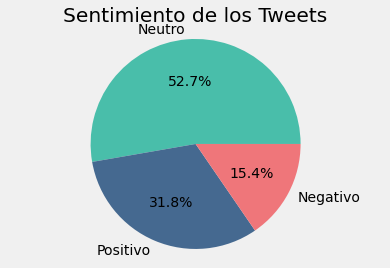

In [24]:
# Gráfico de pie chart con los datos de la polaridad del texto
df.loc[0:200,'Resultado_polaridad'].value_counts()
labels =  'Neutro','Positivo','Negativo'
colors = ['#49BEAA','#456990','#EF767A']
plt.pie(df.loc[0:200,'Resultado_polaridad'].value_counts(), labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Sentimiento de los Tweets')
plt.axis('equal')
plt.show()

Del gráfico podemos determinar que el sentimiento mostrado para los 200 tweets, a los cuales se les realizó la traducción y se obtuvo la polaridad del texto, es que el 52% de estos son considerados con una polaridad neutra, el 32% son tweets positivos acerca de la jornada electorial colombiana de 2022 y el 15% tienen algún componente negativo.

### Obtención de subjetividad y polaridad con texto sin ser traducido (5000 Tweets)

Una vez realizado el análisis de sentimiento para los 200 tweets traducidos, se realiza el ejercicio con la totalidad de estos, para identificar el sentimiento global aunque las asignaciones de polaridad puedan no ser tan bien logradas al tratarse de texto en español.

In [25]:
def obtener_subjetividad2 (texto):
    return TextBlob(texto).sentiment.subjectivity

def obtener_polaridad2 (texto):
    return TextBlob(texto).sentiment.polarity

In [26]:
df['subjetividad'] = df['text'].apply(obtener_subjetividad2)
df['polaridad'] = df['text'].apply(obtener_polaridad2)
df.head(5)

text  subjetividad  polaridad  \
0  TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!\n\nQUE ...           0.0        0.0   
1   | La sencilla celebración de Rodolfo Hernánde...           0.0        0.0   
2  Abrimos hilo \nA propósito de la situación y e...           0.0        0.0   
3  Rodolfo Hernández suele usar palabras explícit...           0.0        0.0   
4  Se los pongo en criollo, para que se entienda:...           0.0        0.0   

   Resultado_polaridad  
0                    1  
1                   -1  
2                    1  
3                   -1  
4                   -1

Asignación de polaridad. Indicamos según los valores obtenidos de polaridad del texto, si esta es positiva (mayor a cero), negativa (menor a cero) o si es neutra (igual a cero)

In [28]:
# Creación de la función para la asignación de la polaridad.
def x_range (x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

In [29]:
# Aplicación de la función a los datos de polaridad
df['Resultado_polaridad'] = df['polaridad'].apply(x_range)

In [30]:
# Visualización de las prmeras filas del dataframe
df.head(100)

text  subjetividad  \
0   TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!\n\nQUE ...           0.0   
1    | La sencilla celebración de Rodolfo Hernánde...           0.0   
2   Abrimos hilo \nA propósito de la situación y e...           0.0   
3   Rodolfo Hernández suele usar palabras explícit...           0.0   
4   Se los pongo en criollo, para que se entienda:...           0.0   
..                                                ...           ...   
95   | La sencilla celebración de Rodolfo Hernánde...           0.0   
96  Se los pongo en criollo, para que se entienda:...           0.0   
97  Rodolfo Hernández hizo una lista de sus 20 dif...           0.0   
98    Para quién pueda hacer algo con esta informa...           0.0   
99  Se los pongo en criollo, para que se entienda:...           0.0   

    polaridad  Resultado_polaridad  
0         0.0                    0  
1         0.0                    0  
2         0.0                    0  
3         0.0                    0  
4         0.0                    0  
..        ...                  ...  
95        0.0                    0  
96        0.0                    0  
97        0.0                    0  
98        0.0                    0  
99        0.0                    0  

[100 rows x 4 columns]

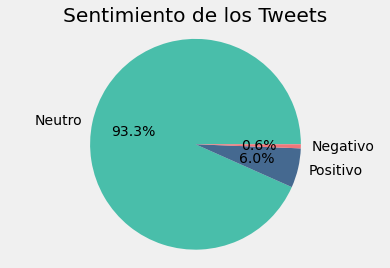

In [32]:
# Gráfico de pie chart con los datos de la polaridad del texto
df['Resultado_polaridad'].value_counts()
labels =  'Neutro','Positivo','Negativo'
colors = ['#49BEAA','#456990','#EF767A']
plt.pie(df['Resultado_polaridad'].value_counts(), labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Sentimiento de los Tweets')
plt.axis('equal')
plt.show()

Como podemos observar en este nuevo gráfico de los sentimientos de los tweets sin traducir, se muestra una enorme cantidad que son entendidos con una polaridad neutra, demostrando que la utilización de estos métodos básicos de medición de sentimientos, requieren de la traducción del texto a inglés con el fin de que sean mucho más acertadas las mediciones de polaridad.

## Creación de nube de términos.

Otra herramienta normalmente utilizada en el análisis de sentimientos de texto es la nube de términos. Esta muestra de manera gráfica la frecuencia de la aparición de palabras en un texto dado.
Lo que nos permite visualizar cuales fuerón las palabras más utilizadas por los colombianos el 29 de mayo en Twitter a tráves de #EleccionesColombia.

In [33]:
# Transformación de todo el texto de los 5000 Tweets en un solo texto
todo_texto = ''.join(df.text)
todo_texto

'TUITAZO DE PETR0! QUE DESPUÈS BORRÒ!!!\n\nQUE TODA  Y EL MUNDO ENTERO VEA ESTE MENSAJE.\n            \n\n  | La sencilla celebración de Rodolfo Hernández tras pasar a segunda vuelta |  |  Abrimos hilo \nA propósito de la situación y el momento electoral que como país vivimos queremos compartir algunas apreciaciones y a partir de ello aportar un grano de arena a la larga y necesaria discusión que deja la primera vuelta presidencial. Rodolfo Hernández suele usar palabras explícitas y llamar “ladrones” y corruptos a sus contrincantes. El constructor millonario y exalcalde de Bucaramanga ha utilizado expresiones machistas y contra los migrantes. Este es un compilado\n\n Se los pongo en criollo, para que se entienda: pueden poner un pastor alemán en segunda vuelta contra  y el 99% de los que fuimos con  nos vamos con el pastor alemán. Esto es todos contra Petro, punto    Para quién pueda hacer algo con esta información. Una persona chilena me dijo que en sus elecciones Boric perdió durante

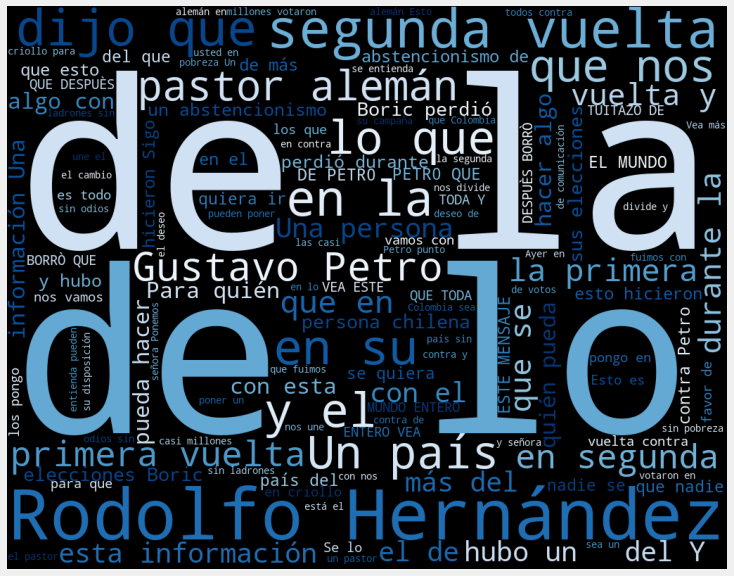

In [35]:
# Generación del gráfico de nube de términos con el texto de los tweets
nube_palabras = WordCloud(width = 1024, height = 800, colormap = 'Blues', min_font_size = 14).generate(todo_texto)
plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(nube_palabras)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

En esta primer nube de palabras podemos ver como se repiten conectores utilizados en nuestro idioma o también conocidas como palabras comunes (de, la ,lo, lo que, en la, y el, del, en su, Y, que se, etc.) que no nos ayudan a establecer los temas o palabras con un significado real.

Por lo que se debe realizar una limpieza adicional del texto.

In [40]:
PALABRAS_COMUNES = ['de', 'la' ,'lo', 'lo que', 'en la', 'y el', 'del','en su', 'Y', 'que se', 'en', 'su', 
                    'que nos', 'que en', 'que', 'se']
palabras = todo_texto.split()
todo_texto_limpio = ['' if palabra in PALABRAS_COMUNES else palabra for palabra in palabras]
todo_texto = " ".join(todo_texto_limpio)

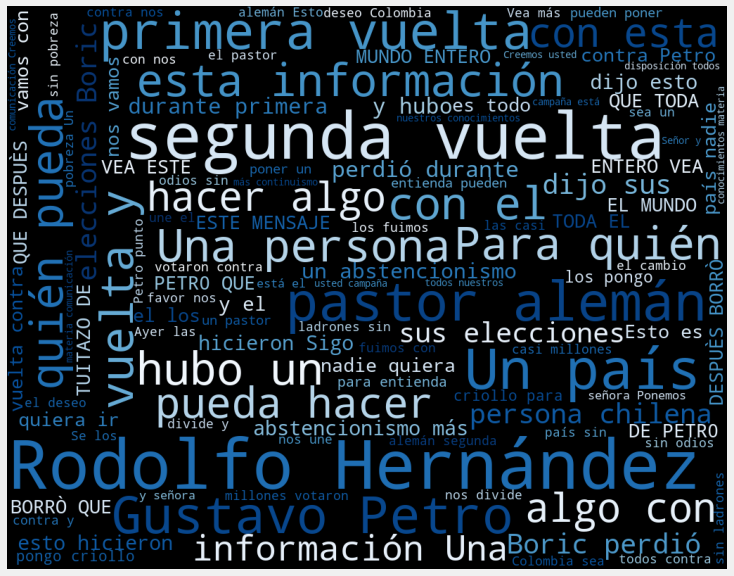

In [41]:
# Generación del gráfico de nube de términos con el texto de los tweets
nube_palabras = WordCloud(width = 1024, height = 800, colormap = 'Blues', min_font_size = 14).generate(todo_texto)
plt.figure(figsize=(10,10), facecolor = None)
plt.imshow(nube_palabras)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

De esta manera podemos ver como según la nube de términos, los colombianos a tráves de 5000 tweets con #EleccionesColombia estabán hablando acerca de temas como:

- Rodolfo Hernández
- Gustavo Petro
- Un país
- Segunda vuelta
- Primera vuelta

# Conclusiones del análisis de sentimientos

Del ejercicio realizado, en el que se toman 5000 tweets del 29 de mayo de 2022 con el numeral #EleccionesColombia se pueden sacar las siguientes conclusiones:
1.	El 32% son tweets positivos acerca de la jornada electoral colombiana y el 15% tienen algún componente negativo. Dado que se utiliza una muestra de la totalidad de los trinos, se podría realizar un ejercicio en el que se extiende esta cantidad, para validar si durante toda la jornada se mantuvo esta polaridad.


2.	En el día de votaciones se estuvieron utilizando distintas palabras en twitter incluidas en #EleccionesColombia, al ser la muestra tomada de los tweets más recientes, es decir, los trinos realizados tras conocer los resultados de las elecciones, las palabras más utilizadas tienen que ver con el conocimiento de los candidatos a continuar en la segunda vuelta electoral.